In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('/Users/danielseymour/Developer/EC334-Summative/processed_data/three_digit_NAICS_final.csv')
df.head()

,year,NAICS,firms,estabs,emp,denom,estabs_entry,estabs_entry_rate,estabs_exit,estabs_exit_rate,...,Basis,weight,tfp_pct_change,tfp_index_2017,firms_percent_destroyed,eer,pct_high_growth_emp,tfp_log,tfp_diff3,tfp_ann_pct
0,1987,211,7297,8942,130532,142230,909,9.665,1836,19.520,...,All workers,0.023260,NaN,60.776,16.499931,5.170498,4.685441,4.107195,NaN,NaN
1,1987,212,6245,8515,285319,296796,1120,13.007,1312,15.236,...,All workers,0.012166,NaN,86.967,12.281825,6.673607,6.086521,4.465529,NaN,NaN
2,1987,213,8315,9765,162956,193482,1262,11.900,2942,27.742,...,All workers,0.003770,NaN,58.849,24.786530,7.373813,6.601782,4.074975,NaN,NaN
3,1987,321,14489,16107,517089,510664,1884,11.717,1828,11.369,...,All workers,0.016190,NaN,104.620,9.110360,4.360401,5.893956,4.650335,NaN,NaN
4,1987,322,3683,5633,572571,572627,330,5.847,351,6.220,...,All workers,0.028750,NaN,96.878,6.163454,1.993968,1.237576,4.573452,NaN,NaN


In [3]:
num_industries = df['Industry'].nunique()
print(num_industries)

36


In [4]:
df['Industry'].unique()

array(['Oil and gas extraction', 'Mining, except oil and gas',
       'Support activities for mining', 'Wood products', 'Paper products',
       'Printing and related support activities',
       'Petroleum and coal products', 'Chemical products',
       'Plastics and rubber products', 'Nonmetallic mineral products',
       'Primary metal products', 'Fabricated metal products', 'Machinery',
       'Computer and electronic products',
       'Electrical equipment, appliances, and components',
       'Furniture and related products', 'Miscellaneous manufacturing',
       'Air transportation', 'Water transportation',
       'Truck transportation',
       'Transit and ground passenger transportation',
       'Pipeline transportation', 'Warehousing and storage',
       'Publishing industries, except internet (includes software)',
       'Motion picture and sound recording industries',
       'Securities, commodity contracts, and other financial investments and related activities',
       'Ins

In [5]:
df.columns

Index(['year', 'NAICS', 'firms', 'estabs', 'emp', 'denom', 'estabs_entry',
       'estabs_entry_rate', 'estabs_exit', 'estabs_exit_rate', 'job_creation',
       'job_creation_births', 'job_creation_continuers',
       'job_creation_rate_births', 'job_creation_rate', 'job_destruction',
       'job_destruction_deaths', 'job_destruction_continuers',
       'job_destruction_rate_deaths', 'job_destruction_rate',
       'net_job_creation', 'net_job_creation_rate', 'reallocation_rate',
       'firmdeath_firms', 'firmdeath_estabs', 'firmdeath_emp', 'Industry',
       'Basis', 'weight', 'tfp_pct_change', 'tfp_index_2017',
       'firms_percent_destroyed', 'eer', 'pct_high_growth_emp', 'tfp_log',
       'tfp_diff3', 'tfp_ann_pct'],
      dtype='object')

In [6]:
# 1  Sort for safe group-operations
df = df.sort_values(['Industry', 'year'])

# 2  Lead the TFP level *one year forward* so that
#    TFP_2014 (calendar) now lives in row with year == 2015 (BDS basis)
df['tfp_ann_pct_lead'] = df.groupby('Industry')['tfp_ann_pct'].shift(-1)

df['tfp_pct_change_lead'] = df.groupby('Industry')['tfp_pct_change'].shift(-1)


In [7]:
df.tail()

,year,NAICS,firms,estabs,emp,denom,estabs_entry,estabs_entry_rate,estabs_exit,estabs_exit_rate,...,tfp_pct_change,tfp_index_2017,firms_percent_destroyed,eer,pct_high_growth_emp,tfp_log,tfp_diff3,tfp_ann_pct,tfp_ann_pct_lead,tfp_pct_change_lead
1119,2018,321,11524,13594,415059,410908,954,7.023,933,6.869,...,-5.2,94.811,5.683790,2.736136,2.905611,4.551885,-0.057227,-1.889487,-2.537062,-1.0
1155,2019,321,11341,13471,416704,415945,897,6.635,995,7.359,...,-1.0,93.869,6.754254,2.527978,2.478978,4.541900,-0.077094,-2.537062,-2.684064,-1.8
1191,2020,321,10821,13012,413299,414559,827,6.311,1012,7.723,...,-1.8,92.162,6.552075,2.519304,2.046460,4.523548,-0.081622,-2.684064,-1.868155,-2.8
1227,2021,321,10813,13054,421499,418119,893,6.847,870,6.671,...,-2.8,89.596,5.289929,2.967337,2.656471,4.495311,-0.056575,-1.868155,-1.749491,-0.6
1263,2022,321,10865,13062,444242,432079,1038,7.949,1032,7.903,...,-0.6,89.028,6.516337,2.383129,2.508993,4.488951,-0.052949,-1.749491,NaN,NaN


In [8]:
# Set display options to show all columns
pd.set_option('display.max_columns', None)

# Set display options to show all rows
pd.set_option('display.max_rows', None)

df.describe()

,year,NAICS,firms,estabs,emp,denom,estabs_entry,estabs_entry_rate,estabs_exit,estabs_exit_rate,job_creation,job_creation_births,job_creation_continuers,job_creation_rate_births,job_creation_rate,job_destruction,job_destruction_deaths,job_destruction_continuers,job_destruction_rate_deaths,job_destruction_rate,net_job_creation,net_job_creation_rate,reallocation_rate,firmdeath_firms,firmdeath_estabs,firmdeath_emp,weight,tfp_pct_change,tfp_index_2017,firms_percent_destroyed,eer,pct_high_growth_emp,tfp_log,tfp_diff3,tfp_ann_pct,tfp_ann_pct_lead,tfp_pct_change_lead
count,1296.000000,1296.000000,1296.000000,1296.000000,1.296000e+03,1.296000e+03,1296.000000,1296.000000,1296.000000,1296.000000,1.296000e+03,1296.000000,1.296000e+03,1296.000000,1296.000000,1.296000e+03,1296.000000,1.296000e+03,1296.000000,1296.000000,1.296000e+03,1296.000000,1296.000000,1296.000000,1296.000000,1296.000000,1296.000000,1260.000000,1296.000000,1296.000000,1296.000000,1296.000000,1296.000000,1188.000000,1188.000000,1188.000000,1260.000000
mean,2004.500000,439.083333,54065.418981,67767.675926,1.310584e+06,1.301591e+06,7730.979167,10.270720,6808.048611,9.790101,2.071624e+05,74559.801698,1.326026e+05,4.920853,14.293715,1.891669e+05,64569.100309,1.245978e+05,4.755776,13.845778,1.799557e+04,0.447952,24.190044,4576.588735,4674.445216,34474.850309,0.027562,0.767063,94.250076,8.049053,4.920813,4.521387,4.526980,0.017640,0.630087,0.630087,0.767063
std,10.392305,140.436284,96608.319576,122389.195735,2.087011e+06,2.063622e+06,14257.005672,4.770377,12265.231277,3.631869,3.926893e+05,156894.283644,2.457642e+05,4.708577,6.925070,3.489188e+05,121452.502630,2.302359e+05,3.234441,6.196792,1.096836e+05,6.634671,9.696577,8507.229254,8726.956074,71561.102724,0.026230,5.545411,15.912088,3.008316,4.708244,4.298803,0.215033,0.084802,2.867410,2.867410,5.545411
min,1987.000000,211.000000,152.000000,160.000000,1.512000e+03,2.055000e+03,29.000000,2.600000,38.000000,3.424000,2.400000e+02,111.000000,1.290000e+02,0.436000,3.602000,4.450000e+02,204.000000,1.050000e+02,0.390000,2.744000,-1.588972e+06,-54.209000,5.489000,4.000000,4.000000,21.000000,0.002737,-47.800000,16.261000,2.211302,0.436261,0.203248,2.788770,-0.624536,-18.793799,-18.793799,-47.800000
25%,1995.750000,326.750000,5613.500000,6916.500000,3.434062e+05,3.434355e+05,592.000000,6.858250,636.750000,7.305500,3.688400e+04,8700.750000,2.720550e+04,2.335750,9.675500,3.882575e+04,11822.250000,2.541500e+04,3.001250,9.884500,-6.559250e+03,-1.667500,17.483750,356.500000,362.500000,3915.750000,0.010048,-1.500000,88.462750,5.949181,2.336037,1.882381,4.482582,-0.021736,-0.721929,-0.721929,-1.500000
50%,2004.500000,482.000000,13942.500000,16213.000000,5.973095e+05,5.987760e+05,1646.000000,9.607500,1684.000000,9.145500,7.111150e+04,19400.000000,5.229000e+04,4.165000,13.095000,7.245000e+04,23196.000000,5.052300e+04,4.124500,12.740500,3.319000e+03,1.002500,22.688000,1179.000000,1189.500000,10214.000000,0.017610,0.500000,97.249000,7.506130,4.164911,3.389406,4.577275,0.011544,0.385543,0.385543,0.500000
75%,2013.250000,524.250000,48112.750000,56022.250000,1.354233e+06,1.352021e+06,5862.250000,12.752500,5054.250000,11.635500,1.888415e+05,63412.500000,1.235045e+05,6.272000,17.370500,1.745168e+05,55113.500000,1.154810e+05,5.775000,16.241250,2.363300e+04,3.090500,28.964500,3469.250000,3492.250000,28413.250000,0.036867,2.600000,101.749500,9.592378,6.272178,5.980467,4.622514,0.049577,1.666297,1.666297,2.600000
max,2022.000000,722.000000,454704.000000,635402.000000,1.233226e+07,1.227560e+07,76884.000000,52.235000,71767.000000,48.831000,2.670136e+06,933155.000000,1.812727e+06,76.891000,87.265000,3.014094e+06,859954.000000,2.229294e+06,59.854000,65.888000,1.327078e+06,72.973000,109.855000,45190.000000,46359.000000,434857.000000,0.161923,45.800000,180.413000,40.789474,76.878613,48.946958,5.195249,0.465792,16.796634,16.796634,45.800000


Basic regressions

In [ ]:
import pandas as pd
import statsmodels.formula.api as smf

# Make sure the panel is sorted
df = df.sort_values(['Industry', 'year'])

# tfp_ann_pct_lead, tfp_pct_change_lead, tfp_diff3, tfp_ann_pct, tfp_log, tfp_index_2017
# eer, pct_high_growth_emp, reallocation_rate

# ------------------------------------------------------------------
# 3.1  Baseline OLS (no fixed effects, robust SE)
# ------------------------------------------------------------------
mod1 = smf.ols(
    'tfp_ann_pct_lead ~ eer',
    data=df
).fit(cov_type='HC1')          # White heteroskedastic SEs

print(mod1.summary())

                            OLS Regression Results                            
Dep. Variable:       tfp_ann_pct_lead   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.7380
Date:                Mon, 26 May 2025   Prob (F-statistic):              0.390
Time:                        12:27:54   Log-Likelihood:                -2936.2
No. Observations:                1188   AIC:                             5876.
Df Residuals:                    1186   BIC:                             5887.
Df Model:                           1                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7089      0.119      5.940      0.0

In [9]:
import pandas as pd
import statsmodels.formula.api as smf
from itertools import product

# Make sure the panel is sorted
df = df.sort_values(['Industry', 'year'])

# Define dependent and independent variables
dependent_vars = [
    'tfp_ann_pct_lead', 
    'tfp_pct_change_lead', 
    'tfp_diff3', 
    'tfp_ann_pct', 
    'tfp_log', 
    'tfp_index_2017'
]

independent_vars = [
    'eer', 
    'pct_high_growth_emp', 
    'reallocation_rate'
]

# Create a dictionary to store results
results = {}

print("="*80)
print("SIMPLE OLS REGRESSION RESULTS")
print("="*80)

# Loop through all combinations of dependent and independent variables
for dep_var in dependent_vars:
    for indep_var in independent_vars:
        
        # Create the formula
        formula = f'{dep_var} ~ {indep_var}'
        
        try:
            # Run the regression
            model = smf.ols(formula, data=df).fit(cov_type='HC1')
            
            # Store results
            key = f'{dep_var}_vs_{indep_var}'
            results[key] = model
            
            # Print summary information
            print(f"\n{'-'*60}")
            print(f"MODEL: {dep_var} ~ {indep_var}")
            print(f"{'-'*60}")
            print(f"R-squared: {model.rsquared:.4f}")
            print(f"Adj. R-squared: {model.rsquared_adj:.4f}")
            print(f"F-statistic: {model.fvalue:.4f}")
            print(f"Prob (F-statistic): {model.f_pvalue:.4f}")
            print(f"N observations: {model.nobs:.0f}")
            
            # Print coefficient information
            coef = model.params[indep_var]
            se = model.HC1_se[indep_var]  # Robust standard errors
            t_stat = model.tvalues[indep_var]
            p_value = model.pvalues[indep_var]
            
            print(f"\nCoefficient on {indep_var}:")
            print(f"  Estimate: {coef:.6f}")
            print(f"  Std Error: {se:.6f}")
            print(f"  t-statistic: {t_stat:.4f}")
            print(f"  p-value: {p_value:.4f}")
            print(f"  Significance: {'***' if p_value < 0.01 else '**' if p_value < 0.05 else '*' if p_value < 0.10 else ''}")
            
        except Exception as e:
            print(f"\nERROR with {dep_var} ~ {indep_var}: {str(e)}")
            continue

# Create a summary table of all results
print("\n" + "="*80)
print("SUMMARY TABLE OF ALL REGRESSIONS")
print("="*80)

summary_data = []
for dep_var in dependent_vars:
    for indep_var in independent_vars:
        key = f'{dep_var}_vs_{indep_var}'
        if key in results:
            model = results[key]
            coef = model.params[indep_var]
            se = model.HC1_se[indep_var]
            p_val = model.pvalues[indep_var]
            r2 = model.rsquared
            n_obs = model.nobs
            
            summary_data.append({
                'Dependent Variable': dep_var,
                'Independent Variable': indep_var,
                'Coefficient': f"{coef:.6f}",
                'Std Error': f"{se:.6f}",
                'p-value': f"{p_val:.4f}",
                'R-squared': f"{r2:.4f}",
                'N': f"{n_obs:.0f}",
                'Significance': '***' if p_val < 0.01 else '**' if p_val < 0.05 else '*' if p_val < 0.10 else ''
            })

# Convert to DataFrame for nice display
summary_df = pd.DataFrame(summary_data)
print(summary_df.to_string(index=False))

# Optional: Save results to CSV
summary_df.to_csv('/Users/danielseymour/Developer/EC334-Summative/processed_data/ols_regression_results.csv', index=False)
print(f"\nResults saved to: /Users/danielseymour/Developer/EC334-Summative/processed_data/ols_regression_results.csv")

# If you want to access individual model results later:
print(f"\nTo access individual models, use: results['dependent_var_vs_independent_var']")
print(f"Example: results['tfp_ann_pct_lead_vs_eer'].summary()")

# Example of accessing a specific model's full summary
print(f"\n" + "="*80)
print("EXAMPLE: Full summary for tfp_ann_pct_lead ~ eer")
print("="*80)
if 'tfp_ann_pct_lead_vs_eer' in results:
    print(results['tfp_ann_pct_lead_vs_eer'].summary())

SIMPLE OLS REGRESSION RESULTS

------------------------------------------------------------
MODEL: tfp_ann_pct_lead ~ eer
------------------------------------------------------------
R-squared: 0.0007
Adj. R-squared: -0.0001
F-statistic: 0.7380
Prob (F-statistic): 0.3905
N observations: 1188

Coefficient on eer:
  Estimate: -0.016165
  Std Error: 0.018817
  t-statistic: -0.8591
  p-value: 0.3903
  Significance: 

------------------------------------------------------------
MODEL: tfp_ann_pct_lead ~ pct_high_growth_emp
------------------------------------------------------------
R-squared: 0.0106
Adj. R-squared: 0.0097
F-statistic: 23.6689
Prob (F-statistic): 0.0000
N observations: 1188

Coefficient on pct_high_growth_emp:
  Estimate: -0.069148
  Std Error: 0.014213
  t-statistic: -4.8651
  p-value: 0.0000
  Significance: ***

------------------------------------------------------------
MODEL: tfp_ann_pct_lead ~ reallocation_rate
---------------------------------------------------------

In [10]:
# Check for reverse causality
from statsmodels.tsa.stattools import grangercausalitytests

# pick two series, say Annual TFP growth and High-growth share
data = df[['tfp_ann_pct','pct_high_growth_emp']].dropna()

# test whether tfp_ann_pct Granger-causes pct_high_growth_emp, up to 3 lags
grangercausalitytests(data[['pct_high_growth_emp','tfp_ann_pct']], maxlag=3)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.5507  , p=0.1105  , df_denom=1184, df_num=1
ssr based chi2 test:   chi2=2.5571  , p=0.1098  , df=1
likelihood ratio test: chi2=2.5544  , p=0.1100  , df=1
parameter F test:         F=2.5507  , p=0.1105  , df_denom=1184, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.8516  , p=0.4270  , df_denom=1181, df_num=2
ssr based chi2 test:   chi2=1.7105  , p=0.4252  , df=2
likelihood ratio test: chi2=1.7093  , p=0.4254  , df=2
parameter F test:         F=0.8516  , p=0.4270  , df_denom=1181, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.6303  , p=0.5955  , df_denom=1178, df_num=3
ssr based chi2 test:   chi2=1.9021  , p=0.5930  , df=3
likelihood ratio test: chi2=1.9006  , p=0.5933  , df=3
parameter F test:         F=0.6303  , p=0.5955  , df_denom=1178, df_num=3


{np.int64(1): ({'ssr_ftest': (np.float64(2.550674270696185),
    np.float64(0.11051403225024332),
    np.float64(1184.0),
    np.int64(1)),
   'ssr_chi2test': (np.float64(2.557137127800989),
    np.float64(0.10979725119605252),
    np.int64(1)),
   'lrtest': (np.float64(2.5543866752914255),
    np.float64(0.10998849063099143),
    np.int64(1)),
   'params_ftest': (np.float64(2.5506742706966268),
    np.float64(0.11051403225022109),
    np.float64(1184.0),
    1.0)},
   array([[0., 1., 0.]])]),
 np.int64(2): ({'ssr_ftest': (np.float64(0.851637517140171),
    np.float64(0.426977492512716),
    np.float64(1181.0),
    np.int64(2)),
   'ssr_chi2test': (np.float64(1.710486190225644),
    np.float64(0.4251798193820432),
    np.int64(2)),
   'lrtest': (np.float64(1.709253916632406),
    np.float64(0.42544186903487125),
    np.int64(2)),
   'params_ftest': (np.float64(0.8516375171401253),
    np.float64(0.426977492512716),
    np.float64(1181.0),
    2.0)},
   array([[0., 0., 1., 0., 0.],
    

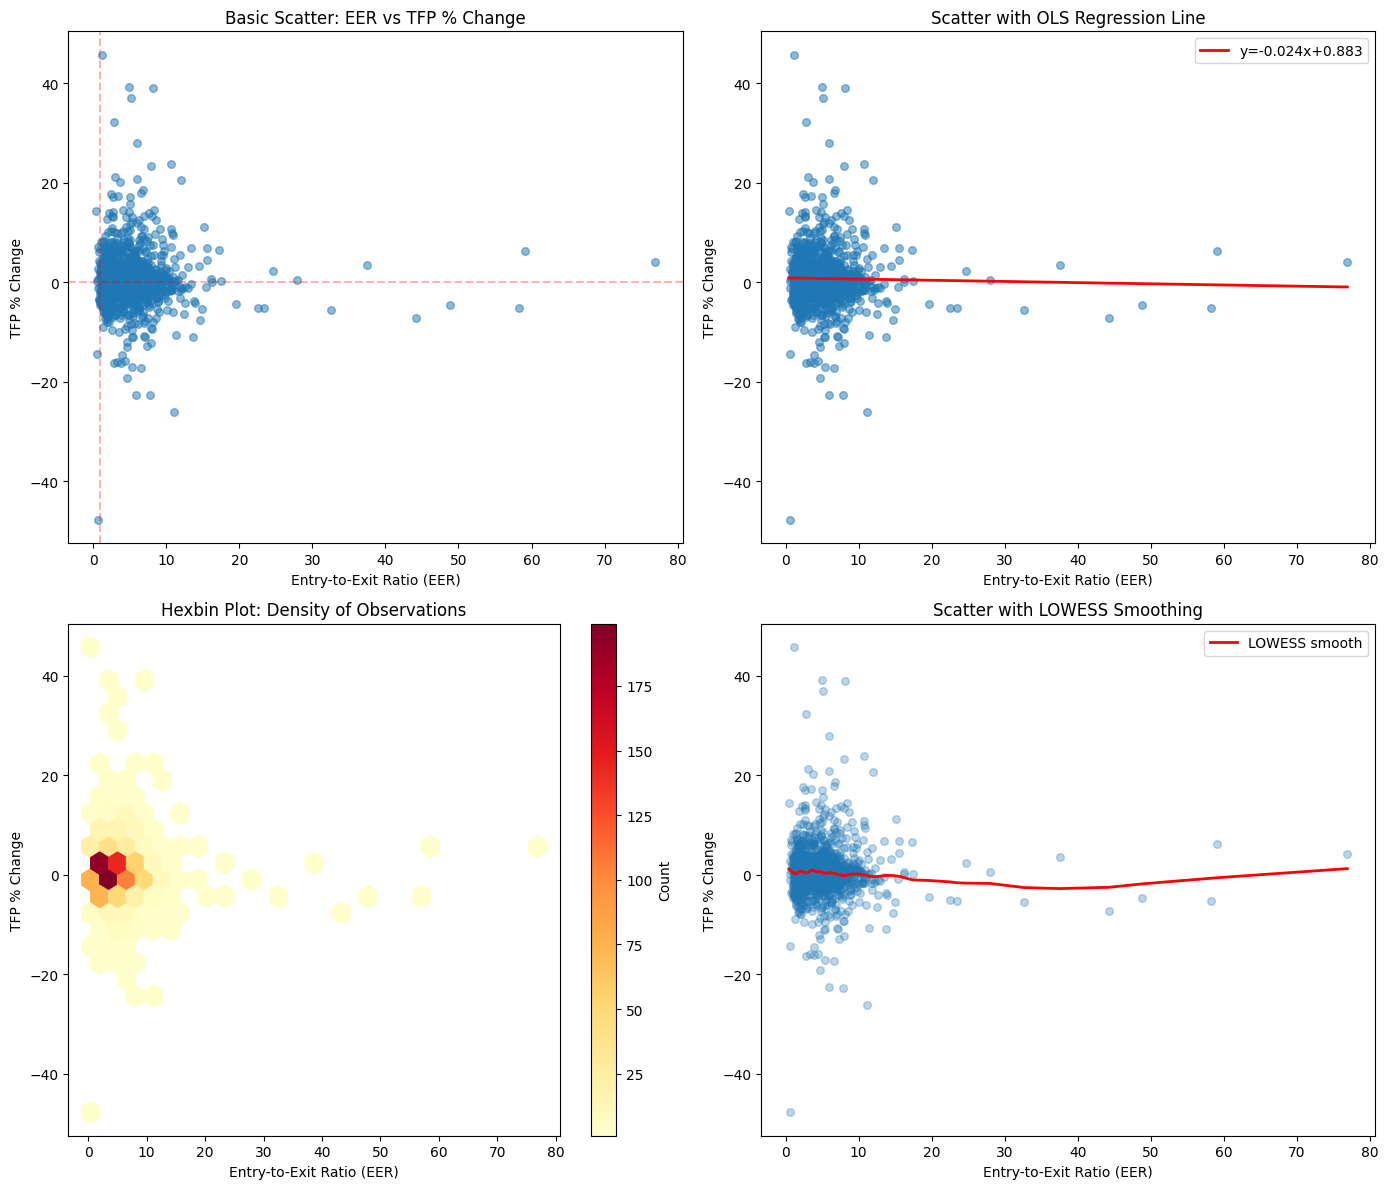

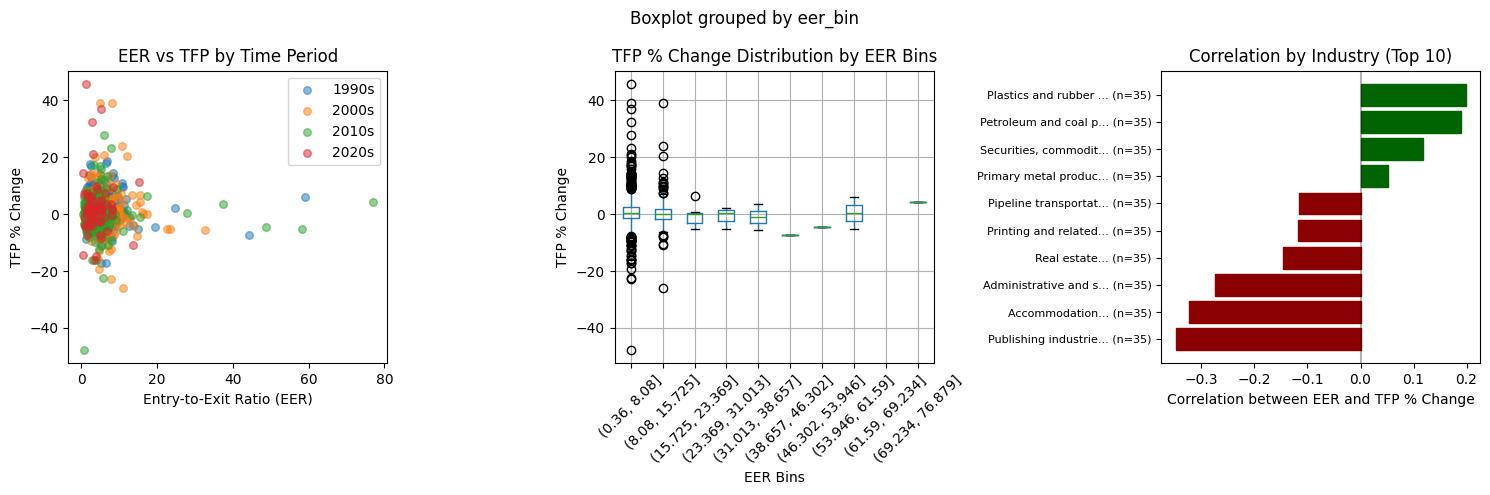


=== Summary Statistics ===
Observations plotted: 1260
EER range: [0.44, 76.88]
TFP % change range: [-47.80, 45.80]
Correlation: -0.0203

=== Distribution Check ===
% of observations with EER > 1: 98.3%
% of observations with positive TFP growth: 55.6%

Outliers (>99th percentile):
EER outliers: 13 observations
TFP % change outliers: 13 observations


In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Remove any rows with missing values for the plot
plot_df = df[['eer', 'tfp_pct_change']].dropna()

# Create figure with multiple visualizations
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# 1. Basic scatter plot
ax1 = axes[0, 0]
ax1.scatter(plot_df['eer'], plot_df['tfp_pct_change'], alpha=0.5, s=30)
ax1.set_xlabel('Entry-to-Exit Ratio (EER)')
ax1.set_ylabel('TFP % Change')
ax1.set_title('Basic Scatter: EER vs TFP % Change')
ax1.axhline(y=0, color='red', linestyle='--', alpha=0.3)
ax1.axvline(x=1, color='red', linestyle='--', alpha=0.3)

# 2. Scatter with regression line
ax2 = axes[0, 1]
ax2.scatter(plot_df['eer'], plot_df['tfp_pct_change'], alpha=0.5, s=30)
# Add regression line
z = np.polyfit(plot_df['eer'], plot_df['tfp_pct_change'], 1)
p = np.poly1d(z)
x_line = np.linspace(plot_df['eer'].min(), plot_df['eer'].max(), 100)
ax2.plot(x_line, p(x_line), "r-", linewidth=2, label=f'y={z[0]:.3f}x+{z[1]:.3f}')
ax2.set_xlabel('Entry-to-Exit Ratio (EER)')
ax2.set_ylabel('TFP % Change')
ax2.set_title('Scatter with OLS Regression Line')
ax2.legend()

# 3. Hexbin plot (good for dense data)
ax3 = axes[1, 0]
hexbin = ax3.hexbin(plot_df['eer'], plot_df['tfp_pct_change'], 
                    gridsize=25, cmap='YlOrRd', mincnt=1)
ax3.set_xlabel('Entry-to-Exit Ratio (EER)')
ax3.set_ylabel('TFP % Change')
ax3.set_title('Hexbin Plot: Density of Observations')
plt.colorbar(hexbin, ax=ax3, label='Count')

# 4. Scatter with smoothed trend (LOWESS)
ax4 = axes[1, 1]
ax4.scatter(plot_df['eer'], plot_df['tfp_pct_change'], alpha=0.3, s=30)
# Add LOWESS smoothing
from statsmodels.nonparametric.smoothers_lowess import lowess
# Sort for smooth line
sorted_df = plot_df.sort_values('eer')
smoothed = lowess(sorted_df['tfp_pct_change'], sorted_df['eer'], frac=0.15)
ax4.plot(smoothed[:, 0], smoothed[:, 1], 'r-', linewidth=2, label='LOWESS smooth')
ax4.set_xlabel('Entry-to-Exit Ratio (EER)')
ax4.set_ylabel('TFP % Change')
ax4.set_title('Scatter with LOWESS Smoothing')
ax4.legend()

plt.tight_layout()
plt.show()

# Additional analysis plots
fig2, axes2 = plt.subplots(1, 3, figsize=(15, 5))

# 5. By time period (if you want to see temporal patterns)
ax5 = axes2[0]
# Create time period bins
df['period'] = pd.cut(df['year'], bins=[1990, 2000, 2010, 2020, 2023], 
                      labels=['1990s', '2000s', '2010s', '2020s'])
for period in df['period'].dropna().unique():
    period_data = df[df['period'] == period]
    ax5.scatter(period_data['eer'], period_data['tfp_pct_change'], 
                alpha=0.5, s=30, label=period)
ax5.set_xlabel('Entry-to-Exit Ratio (EER)')
ax5.set_ylabel('TFP % Change')
ax5.set_title('EER vs TFP by Time Period')
ax5.legend()

# 6. Box plot to see distribution by EER bins
ax6 = axes2[1]
# Create EER bins
plot_df['eer_bin'] = pd.cut(plot_df['eer'], bins=10)
plot_df.boxplot(column='tfp_pct_change', by='eer_bin', ax=ax6, rot=45)
ax6.set_xlabel('EER Bins')
ax6.set_ylabel('TFP % Change')
ax6.set_title('TFP % Change Distribution by EER Bins')

# 7. Correlation by industry (top 10 industries by observation count)
ax7 = axes2[2]
industry_counts = df.groupby('Industry').size().sort_values(ascending=False)
top_industries = industry_counts.head(10).index
correlations = []
for ind in top_industries:
    ind_data = df[df['Industry'] == ind][['eer', 'tfp_pct_change']].dropna()
    if len(ind_data) > 10:  # Need enough data points
        corr = ind_data['eer'].corr(ind_data['tfp_pct_change'])
        correlations.append({'Industry': ind, 'Correlation': corr, 'N': len(ind_data)})

corr_df = pd.DataFrame(correlations).sort_values('Correlation')
bars = ax7.barh(range(len(corr_df)), corr_df['Correlation'])
ax7.set_yticks(range(len(corr_df)))
ax7.set_yticklabels([f"{row['Industry'][:20]}... (n={row['N']})" 
                     for _, row in corr_df.iterrows()], fontsize=8)
ax7.set_xlabel('Correlation between EER and TFP % Change')
ax7.set_title('Correlation by Industry (Top 10)')
ax7.axvline(x=0, color='black', linestyle='-', alpha=0.3)
# Color bars by sign
for i, (bar, corr) in enumerate(zip(bars, corr_df['Correlation'])):
    bar.set_color('darkgreen' if corr > 0 else 'darkred')

plt.tight_layout()
plt.show()

# Print summary statistics
print("\n=== Summary Statistics ===")
print(f"Observations plotted: {len(plot_df)}")
print(f"EER range: [{plot_df['eer'].min():.2f}, {plot_df['eer'].max():.2f}]")
print(f"TFP % change range: [{plot_df['tfp_pct_change'].min():.2f}, {plot_df['tfp_pct_change'].max():.2f}]")
print(f"Correlation: {plot_df['eer'].corr(plot_df['tfp_pct_change']):.4f}")

# Distribution check
print("\n=== Distribution Check ===")
print(f"% of observations with EER > 1: {(plot_df['eer'] > 1).mean()*100:.1f}%")
print(f"% of observations with positive TFP growth: {(plot_df['tfp_pct_change'] > 0).mean()*100:.1f}%")

# Outlier detection
eer_outliers = plot_df['eer'] > plot_df['eer'].quantile(0.99)
tfp_outliers = abs(plot_df['tfp_pct_change']) > plot_df['tfp_pct_change'].abs().quantile(0.99)
print(f"\nOutliers (>99th percentile):")
print(f"EER outliers: {eer_outliers.sum()} observations")
print(f"TFP % change outliers: {tfp_outliers.sum()} observations")

In [86]:
df.columns

Index(['year', 'NAICS', 'firms', 'estabs', 'emp', 'denom', 'estabs_entry',
       'estabs_entry_rate', 'estabs_exit', 'estabs_exit_rate', 'job_creation',
       'job_creation_births', 'job_creation_continuers',
       'job_creation_rate_births', 'job_creation_rate', 'job_destruction',
       'job_destruction_deaths', 'job_destruction_continuers',
       'job_destruction_rate_deaths', 'job_destruction_rate',
       'net_job_creation', 'net_job_creation_rate', 'reallocation_rate',
       'firmdeath_firms', 'firmdeath_estabs', 'firmdeath_emp', 'Industry',
       'Basis', 'weight', 'tfp_pct_change', 'tfp_index_2017',
       'firms_percent_destroyed', 'eer', 'pct_high_growth_emp', 'tfp_log',
       'tfp_diff3', 'tfp_ann_pct', 'tfp_index_bds', 'tfp_pct_change_bds',
       'tfp_log_bds', 'dlog_tfp_bds', 'dlog_tfp_bds_3y', 'period'],
      dtype='object')

Found 4 TFP measures: tfp_pct_change, tfp_pct_change_bds, dlog_tfp_bds, dlog_tfp_bds_3y
Found 3 dynamism variables: eer, firms_percent_destroyed, net_job_creation_rate


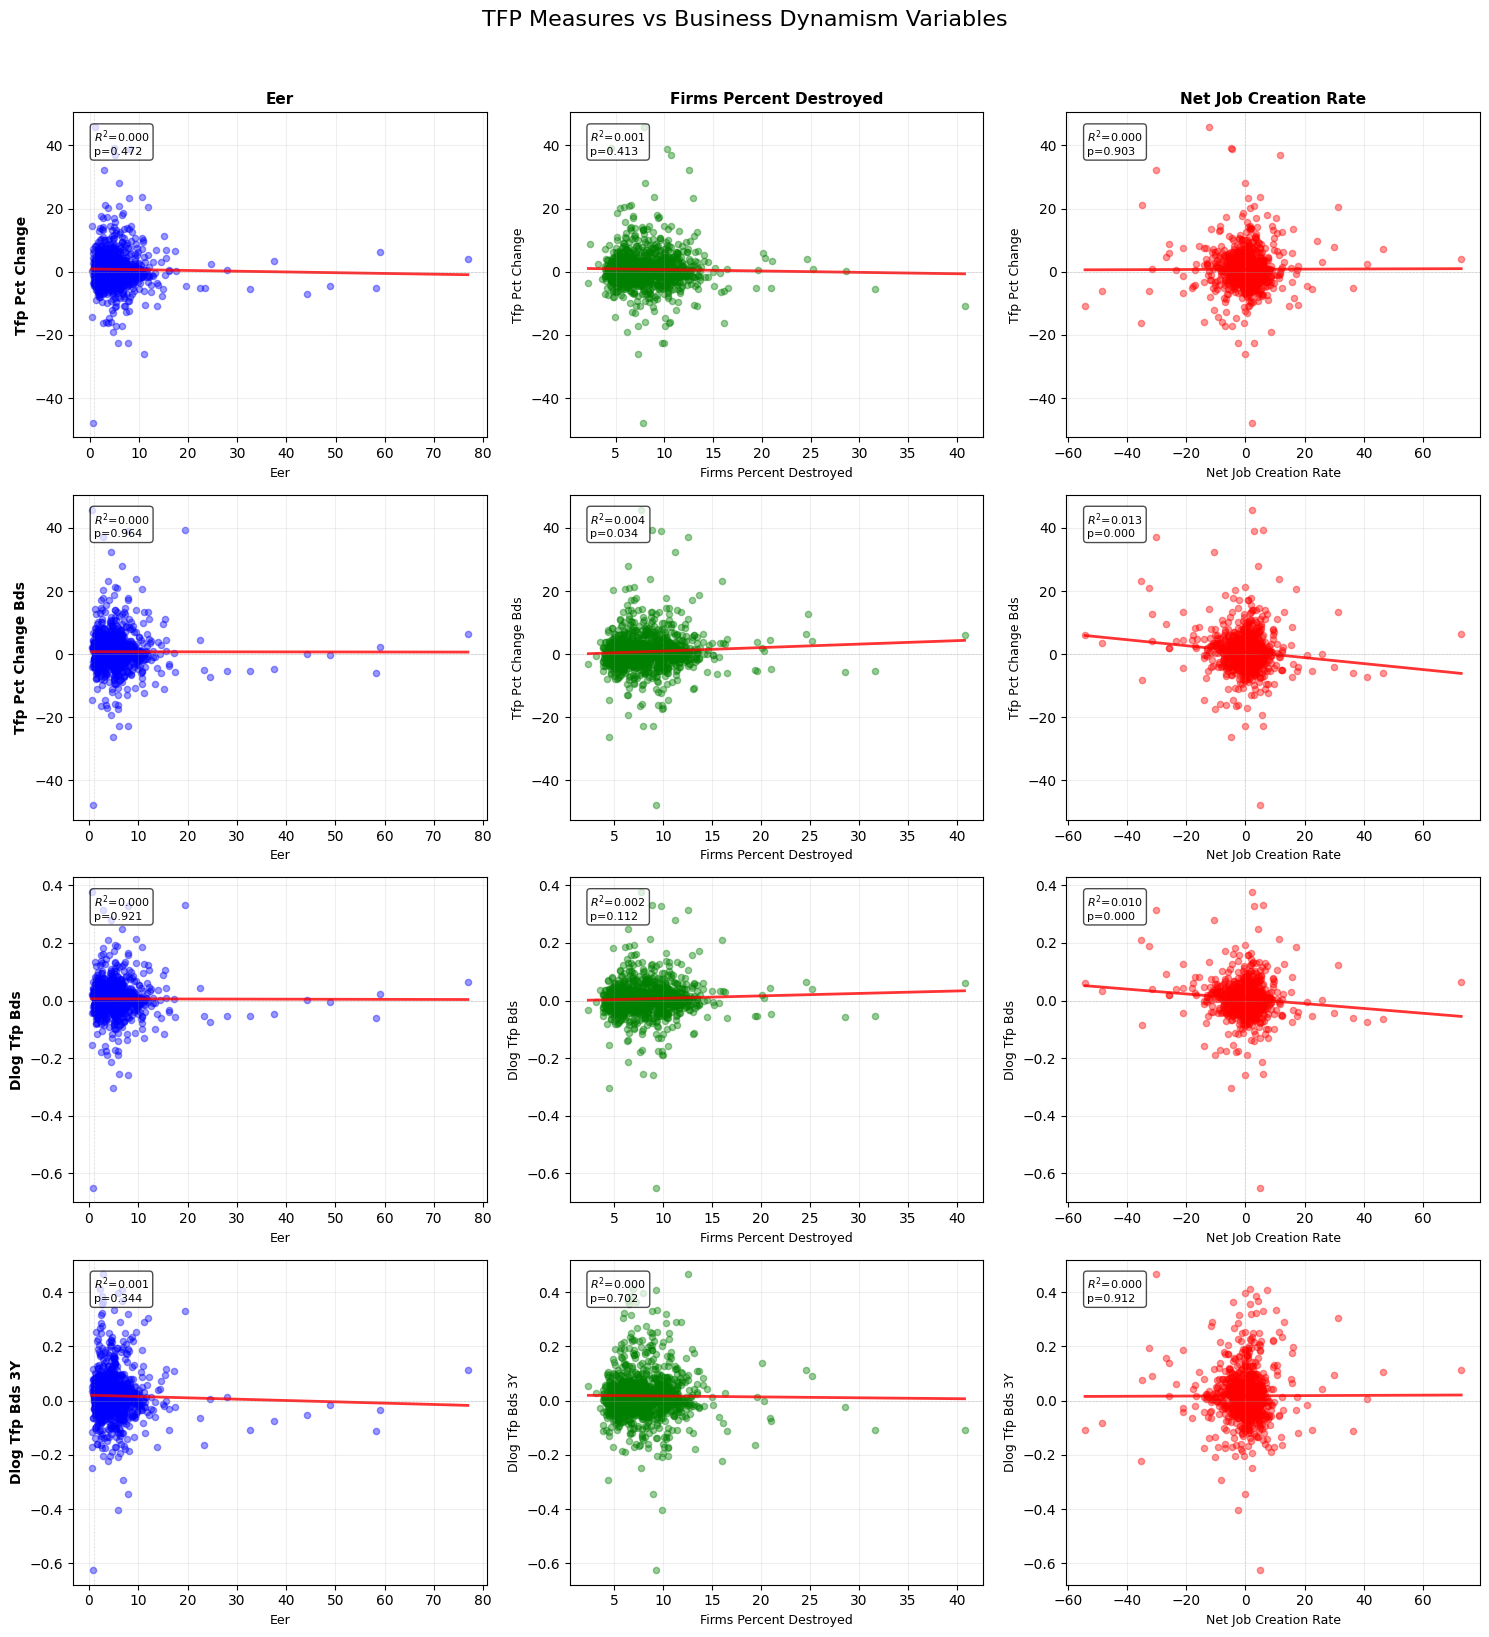


=== Correlation Matrix: All TFP Measures vs Business Dynamism ===


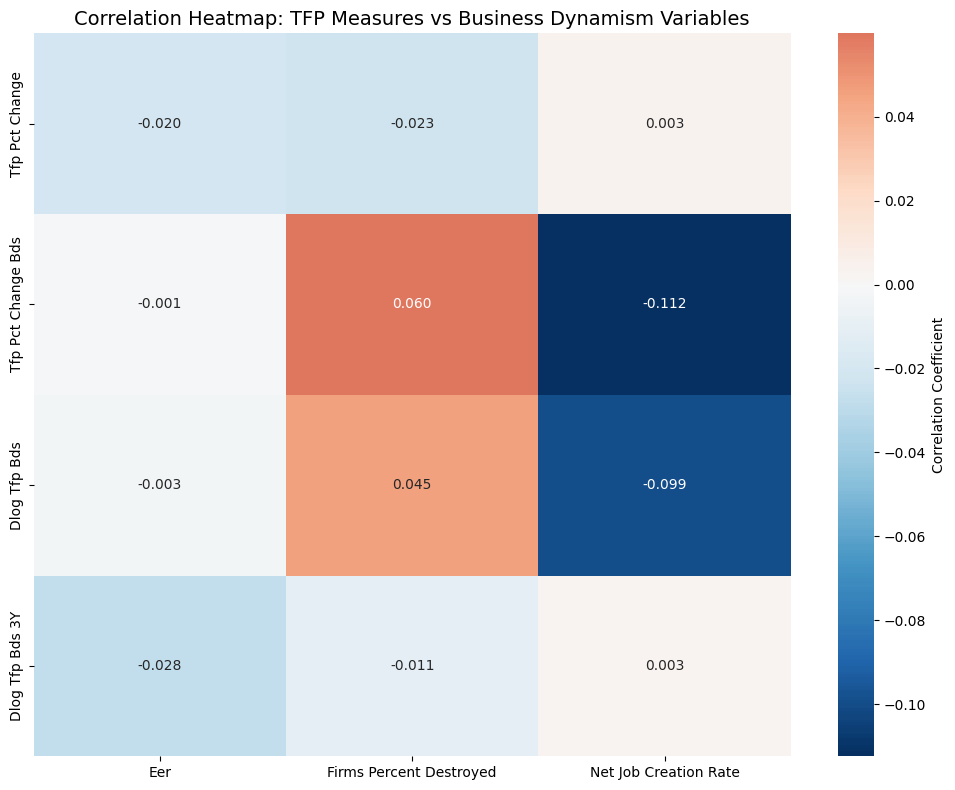


=== Comparing TFP Measures ===


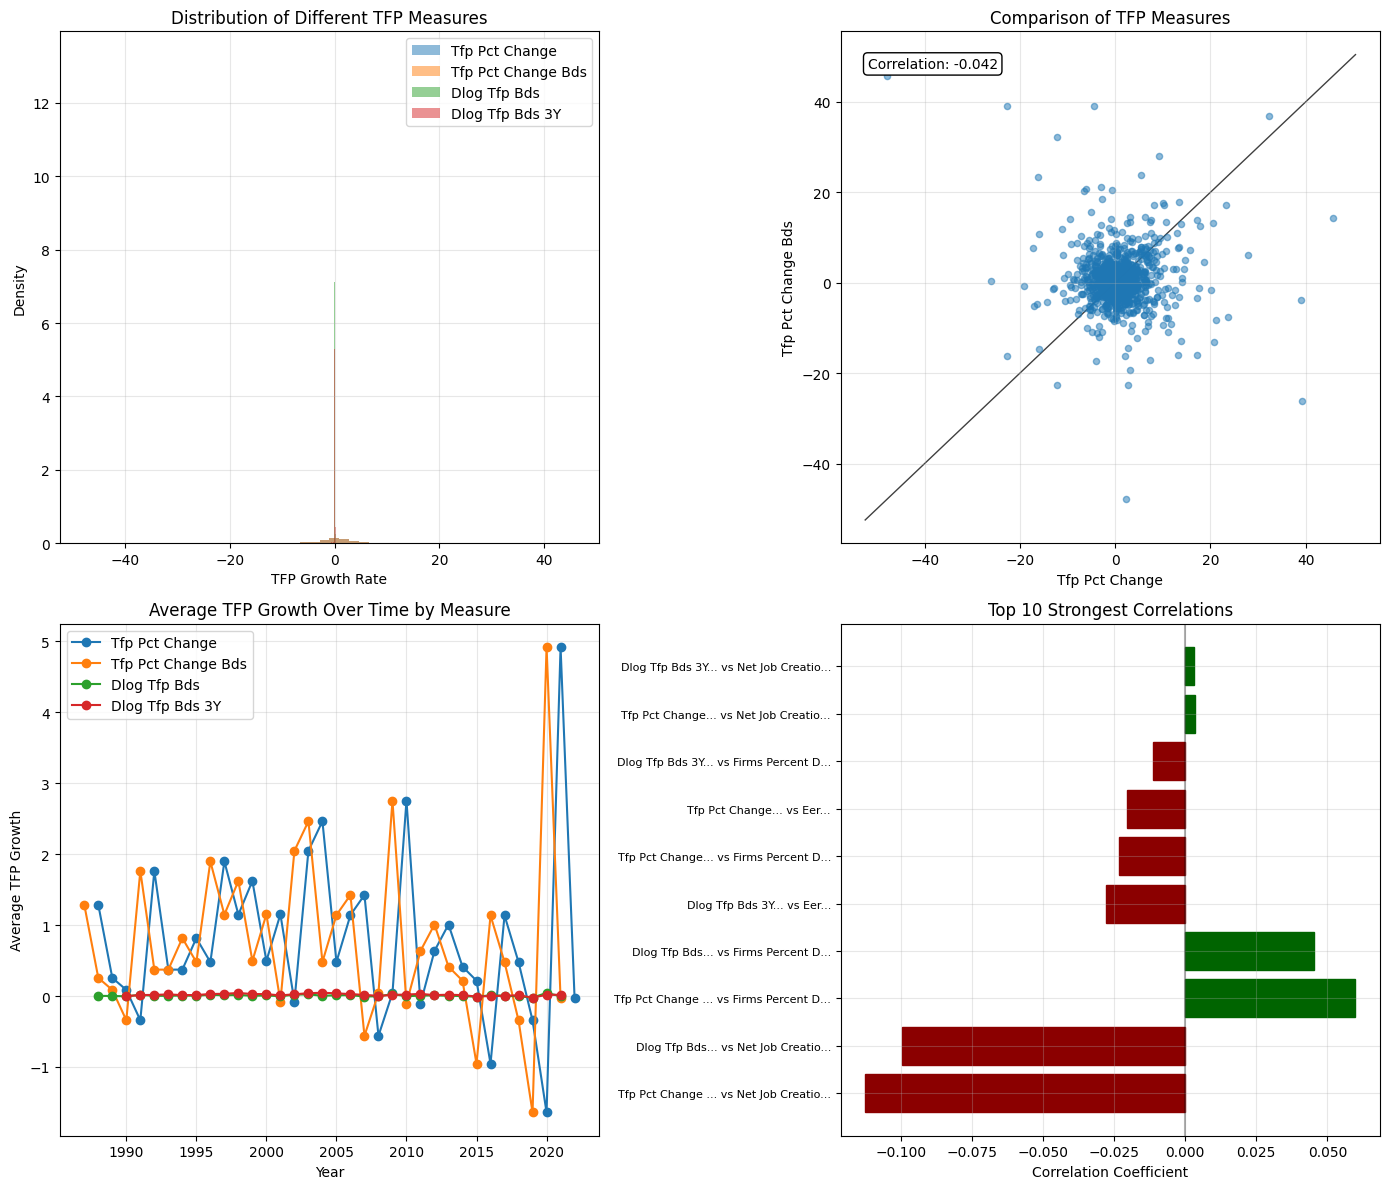


=== Summary Statistics for TFP Measures ===
       TFP Measure     Mean  Std Dev        Min       Max  Skewness    N
    Tfp Pct Change 0.767063 5.545411 -47.800000 45.800000  0.947437 1260
Tfp Pct Change Bds 0.767063 5.545411 -47.800000 45.800000  0.947437 1260
      Dlog Tfp Bds 0.005975 0.055471  -0.649531  0.377343 -0.719403 1224
   Dlog Tfp Bds 3Y 0.017735 0.085467  -0.624536  0.465792  0.444902 1152

=== Regression Results Summary ===
Significant relationships (p < 0.05):
               TFP             Dynamism     Slope       R²  p-value
Tfp Pct Change Bds Firms Percent Destro  0.109913 0.003587 0.033517
Tfp Pct Change Bds Net Job Creation Rat -0.094451 0.012647 0.000063
      Dlog Tfp Bds Net Job Creation Rat -0.000839 0.009886 0.000495

=== Industry-Specific Analysis (Top Industries) ===
Analyzing: Tfp Pct Change Bds vs Net Job Creation Rate
Overall correlation: -0.112

Industry-specific correlations:
Accommodation                  Corr:  0.256  N:   35
Administrative and sup

In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

# Define all TFP measures
tfp_measures = [
    'tfp_pct_change',          # Original TFP percent change
    'tfp_pct_change_bds',      # BDS-aligned TFP percent change
    'dlog_tfp_bds',            # Log difference of TFP (1-year)
    'dlog_tfp_bds_3y'          # Log difference of TFP (3-year)
]

# Define key business dynamism variables to analyze
dynamism_vars = [
    'eer',                          # Entry-to-Exit Ratio
    'firms_percent_created',        # Entry rate
    'firms_percent_destroyed',      # Exit rate
    'net_job_creation_rate'         # Net job creation rate
]

# Filter to only include variables that exist
tfp_measures = [var for var in tfp_measures if var in df.columns]
dynamism_vars = [var for var in dynamism_vars if var in df.columns]

print(f"Found {len(tfp_measures)} TFP measures: {', '.join(tfp_measures)}")
print(f"Found {len(dynamism_vars)} dynamism variables: {', '.join(dynamism_vars)}")

# Create comprehensive scatter plot matrix
fig, axes = plt.subplots(len(tfp_measures), len(dynamism_vars), 
                        figsize=(5*len(dynamism_vars), 4*len(tfp_measures)))

# Handle single row/column cases
if len(tfp_measures) == 1:
    axes = axes.reshape(1, -1)
if len(dynamism_vars) == 1:
    axes = axes.reshape(-1, 1)

# Color scheme
colors = ['blue', 'green', 'red', 'purple', 'orange', 'brown', 'pink', 'gray']

# Plot each combination
for i, tfp_var in enumerate(tfp_measures):
    for j, dyn_var in enumerate(dynamism_vars):
        ax = axes[i, j] if len(tfp_measures) > 1 and len(dynamism_vars) > 1 else axes[i] if len(tfp_measures) > 1 else axes[j] if len(dynamism_vars) > 1 else axes
        
        # Prepare data
        plot_data = df[[dyn_var, tfp_var]].dropna()
        
        if len(plot_data) > 0:
            # Scatter plot
            ax.scatter(plot_data[dyn_var], plot_data[tfp_var], 
                      alpha=0.4, s=20, color=colors[j % len(colors)])
            
            # Add regression line if enough data
            if len(plot_data) > 10:
                slope, intercept, r_value, p_value, std_err = stats.linregress(
                    plot_data[dyn_var], plot_data[tfp_var]
                )
                
                # Plot regression line
                x_line = np.linspace(plot_data[dyn_var].min(), plot_data[dyn_var].max(), 100)
                y_line = slope * x_line + intercept
                ax.plot(x_line, y_line, 'r-', linewidth=2, alpha=0.8)
                
                # Add stats to plot
                textstr = f'$R^2$={r_value**2:.3f}\np={p_value:.3f}'
                ax.text(0.05, 0.95, textstr, transform=ax.transAxes, 
                       verticalalignment='top', fontsize=8,
                       bbox=dict(boxstyle='round', facecolor='white', alpha=0.7))
            
            # Formatting
            ax.set_xlabel(dyn_var.replace('_', ' ').title(), fontsize=9)
            ax.set_ylabel(tfp_var.replace('_', ' ').title(), fontsize=9)
            
            # Add reference lines
            ax.axhline(y=0, color='gray', linestyle='--', alpha=0.3, linewidth=0.5)
            if dyn_var == 'eer':
                ax.axvline(x=1, color='gray', linestyle='--', alpha=0.3, linewidth=0.5)
            elif dyn_var == 'net_job_creation_rate':
                ax.axvline(x=0, color='gray', linestyle='--', alpha=0.3, linewidth=0.5)
            
            # Title for top row
            if i == 0:
                ax.set_title(dyn_var.replace('_', ' ').title(), fontsize=11, fontweight='bold')
            
            # Y-axis label for first column
            if j == 0:
                ax.set_ylabel(tfp_var.replace('_', ' ').title(), fontsize=10, fontweight='bold')
            
            ax.grid(True, alpha=0.2)
        else:
            ax.text(0.5, 0.5, 'No data', transform=ax.transAxes, 
                   ha='center', va='center')

plt.suptitle('TFP Measures vs Business Dynamism Variables', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

# Correlation heatmap
print("\n=== Correlation Matrix: All TFP Measures vs Business Dynamism ===")
corr_data = df[tfp_measures + dynamism_vars].corr()
corr_subset = corr_data.loc[tfp_measures, dynamism_vars]

fig2, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_subset, annot=True, fmt='.3f', cmap='RdBu_r', center=0,
            cbar_kws={'label': 'Correlation Coefficient'},
            xticklabels=[var.replace('_', ' ').title() for var in dynamism_vars],
            yticklabels=[var.replace('_', ' ').title() for var in tfp_measures])
plt.title('Correlation Heatmap: TFP Measures vs Business Dynamism Variables', fontsize=14)
plt.tight_layout()
plt.show()

# Detailed comparison of TFP measures
print("\n=== Comparing TFP Measures ===")
fig3, axes3 = plt.subplots(2, 2, figsize=(14, 12))

# 1. Distribution of TFP measures
ax1 = axes3[0, 0]
for tfp_var in tfp_measures:
    data = df[tfp_var].dropna()
    ax1.hist(data, bins=50, alpha=0.5, label=tfp_var.replace('_', ' ').title(), density=True)
ax1.set_xlabel('TFP Growth Rate')
ax1.set_ylabel('Density')
ax1.set_title('Distribution of Different TFP Measures')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 2. Correlation between TFP measures
ax2 = axes3[0, 1]
if len(tfp_measures) >= 2:
    # Plot first two TFP measures against each other
    tfp1, tfp2 = tfp_measures[0], tfp_measures[1]
    plot_data = df[[tfp1, tfp2]].dropna()
    ax2.scatter(plot_data[tfp1], plot_data[tfp2], alpha=0.5, s=20)
    
    # Add 45-degree line
    lims = [
        np.min([ax2.get_xlim(), ax2.get_ylim()]),
        np.max([ax2.get_xlim(), ax2.get_ylim()]),
    ]
    ax2.plot(lims, lims, 'k-', alpha=0.75, zorder=0, linewidth=1)
    
    # Calculate correlation
    corr = plot_data[tfp1].corr(plot_data[tfp2])
    ax2.text(0.05, 0.95, f'Correlation: {corr:.3f}', transform=ax2.transAxes,
            verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white'))
    
    ax2.set_xlabel(tfp1.replace('_', ' ').title())
    ax2.set_ylabel(tfp2.replace('_', ' ').title())
    ax2.set_title('Comparison of TFP Measures')
    ax2.grid(True, alpha=0.3)

# 3. Time series of average TFP by measure
ax3 = axes3[1, 0]
for tfp_var in tfp_measures:
    annual_avg = df.groupby('year')[tfp_var].mean()
    ax3.plot(annual_avg.index, annual_avg.values, marker='o', label=tfp_var.replace('_', ' ').title())
ax3.set_xlabel('Year')
ax3.set_ylabel('Average TFP Growth')
ax3.set_title('Average TFP Growth Over Time by Measure')
ax3.legend()
ax3.grid(True, alpha=0.3)

# 4. Strongest relationships summary
ax4 = axes3[1, 1]
# Find strongest correlations
all_corrs = []
for tfp_var in tfp_measures:
    for dyn_var in dynamism_vars:
        valid_data = df[[tfp_var, dyn_var]].dropna()
        if len(valid_data) > 10:
            corr = valid_data[tfp_var].corr(valid_data[dyn_var])
            all_corrs.append({
                'TFP Measure': tfp_var.replace('_', ' ').title(),
                'Dynamism Variable': dyn_var.replace('_', ' ').title(),
                'Correlation': corr
            })

corr_df = pd.DataFrame(all_corrs)
# Get top 10 by absolute correlation
corr_df['Abs_Corr'] = corr_df['Correlation'].abs()
top_corrs = corr_df.nlargest(10, 'Abs_Corr')

# Create horizontal bar plot
y_pos = np.arange(len(top_corrs))
bars = ax4.barh(y_pos, top_corrs['Correlation'])

# Color bars by sign
for bar, corr in zip(bars, top_corrs['Correlation']):
    bar.set_color('darkgreen' if corr > 0 else 'darkred')

# Labels
labels = [f"{row['TFP Measure'][:15]}... vs {row['Dynamism Variable'][:15]}..." 
          for _, row in top_corrs.iterrows()]
ax4.set_yticks(y_pos)
ax4.set_yticklabels(labels, fontsize=8)
ax4.set_xlabel('Correlation Coefficient')
ax4.set_title('Top 10 Strongest Correlations')
ax4.axvline(x=0, color='black', linestyle='-', alpha=0.3)
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Summary statistics table
print("\n=== Summary Statistics for TFP Measures ===")
tfp_stats = []
for tfp_var in tfp_measures:
    data = df[tfp_var].dropna()
    tfp_stats.append({
        'TFP Measure': tfp_var.replace('_', ' ').title(),
        'Mean': data.mean(),
        'Std Dev': data.std(),
        'Min': data.min(),
        'Max': data.max(),
        'Skewness': data.skew(),
        'N': len(data)
    })

tfp_stats_df = pd.DataFrame(tfp_stats)
print(tfp_stats_df.to_string(index=False))

# Regression results summary
print("\n=== Regression Results Summary ===")
print("Significant relationships (p < 0.05):")
significant_results = []

for tfp_var in tfp_measures:
    for dyn_var in dynamism_vars:
        plot_data = df[[dyn_var, tfp_var]].dropna()
        if len(plot_data) > 10:
            slope, intercept, r_value, p_value, std_err = stats.linregress(
                plot_data[dyn_var], plot_data[tfp_var]
            )
            if p_value < 0.05:
                significant_results.append({
                    'TFP': tfp_var.replace('_', ' ').title()[:20],
                    'Dynamism': dyn_var.replace('_', ' ').title()[:20],
                    'Slope': slope,
                    'R²': r_value**2,
                    'p-value': p_value
                })

if significant_results:
    sig_df = pd.DataFrame(significant_results)
    print(sig_df.to_string(index=False))
else:
    print("No significant relationships found at p < 0.05 level")

# Industry-specific analysis for best performing combination
print("\n=== Industry-Specific Analysis (Top Industries) ===")
if all_corrs:
    # Find the combination with highest R²
    best_combo = max(all_corrs, key=lambda x: abs(x['Correlation']))
    
    # Find the actual variable names from our lists
    best_tfp = None
    best_dyn = None
    
    # Match TFP measure
    for tfp_var in tfp_measures:
        if tfp_var.replace('_', ' ').title() == best_combo['TFP Measure']:
            best_tfp = tfp_var
            break
    
    # Match dynamism variable
    for dyn_var in dynamism_vars:
        if dyn_var.replace('_', ' ').title() == best_combo['Dynamism Variable']:
            best_dyn = dyn_var
            break
    
    if best_tfp and best_dyn:
        print(f"Analyzing: {best_combo['TFP Measure']} vs {best_combo['Dynamism Variable']}")
        print(f"Overall correlation: {best_combo['Correlation']:.3f}")
        
        # Get top 5 industries by observation count
        industry_counts = df.groupby('Industry').size().sort_values(ascending=False)
        top_industries = industry_counts.head(5).index
        
        print("\nIndustry-specific correlations:")
        for industry in top_industries:
            ind_data = df[df['Industry'] == industry][[best_tfp, best_dyn]].dropna()
            if len(ind_data) > 10:
                corr = ind_data[best_tfp].corr(ind_data[best_dyn])
                print(f"{industry[:30]:30} Corr: {corr:6.3f}  N: {len(ind_data):4d}")
    else:
        print("Could not identify best combination variables")
else:
    print("No correlations computed")

=== Winsorizing Data at 1% Level ===

Original data ranges:
tfp_pct_change                 Min:    -47.800 Max:     45.800
tfp_pct_change_bds             Min:    -47.800 Max:     45.800
dlog_tfp_bds                   Min:     -0.650 Max:      0.377
dlog_tfp_bds_3y                Min:     -0.625 Max:      0.466
eer                            Min:      0.436 Max:     76.879
firms_percent_destroyed        Min:      2.211 Max:     40.789
net_job_creation_rate          Min:    -54.209 Max:     72.973

Winsorized data ranges:
tfp_pct_change                 Min:    -14.400 Max:     18.600
tfp_pct_change_bds             Min:    -14.400 Max:     18.600
dlog_tfp_bds                   Min:     -0.155 Max:      0.171
dlog_tfp_bds_3y                Min:     -0.186 Max:      0.321
eer                            Min:      0.886 Max:     17.476
firms_percent_destroyed        Min:      4.023 Max:     19.375
net_job_creation_rate          Min:    -21.211 Max:     17.405


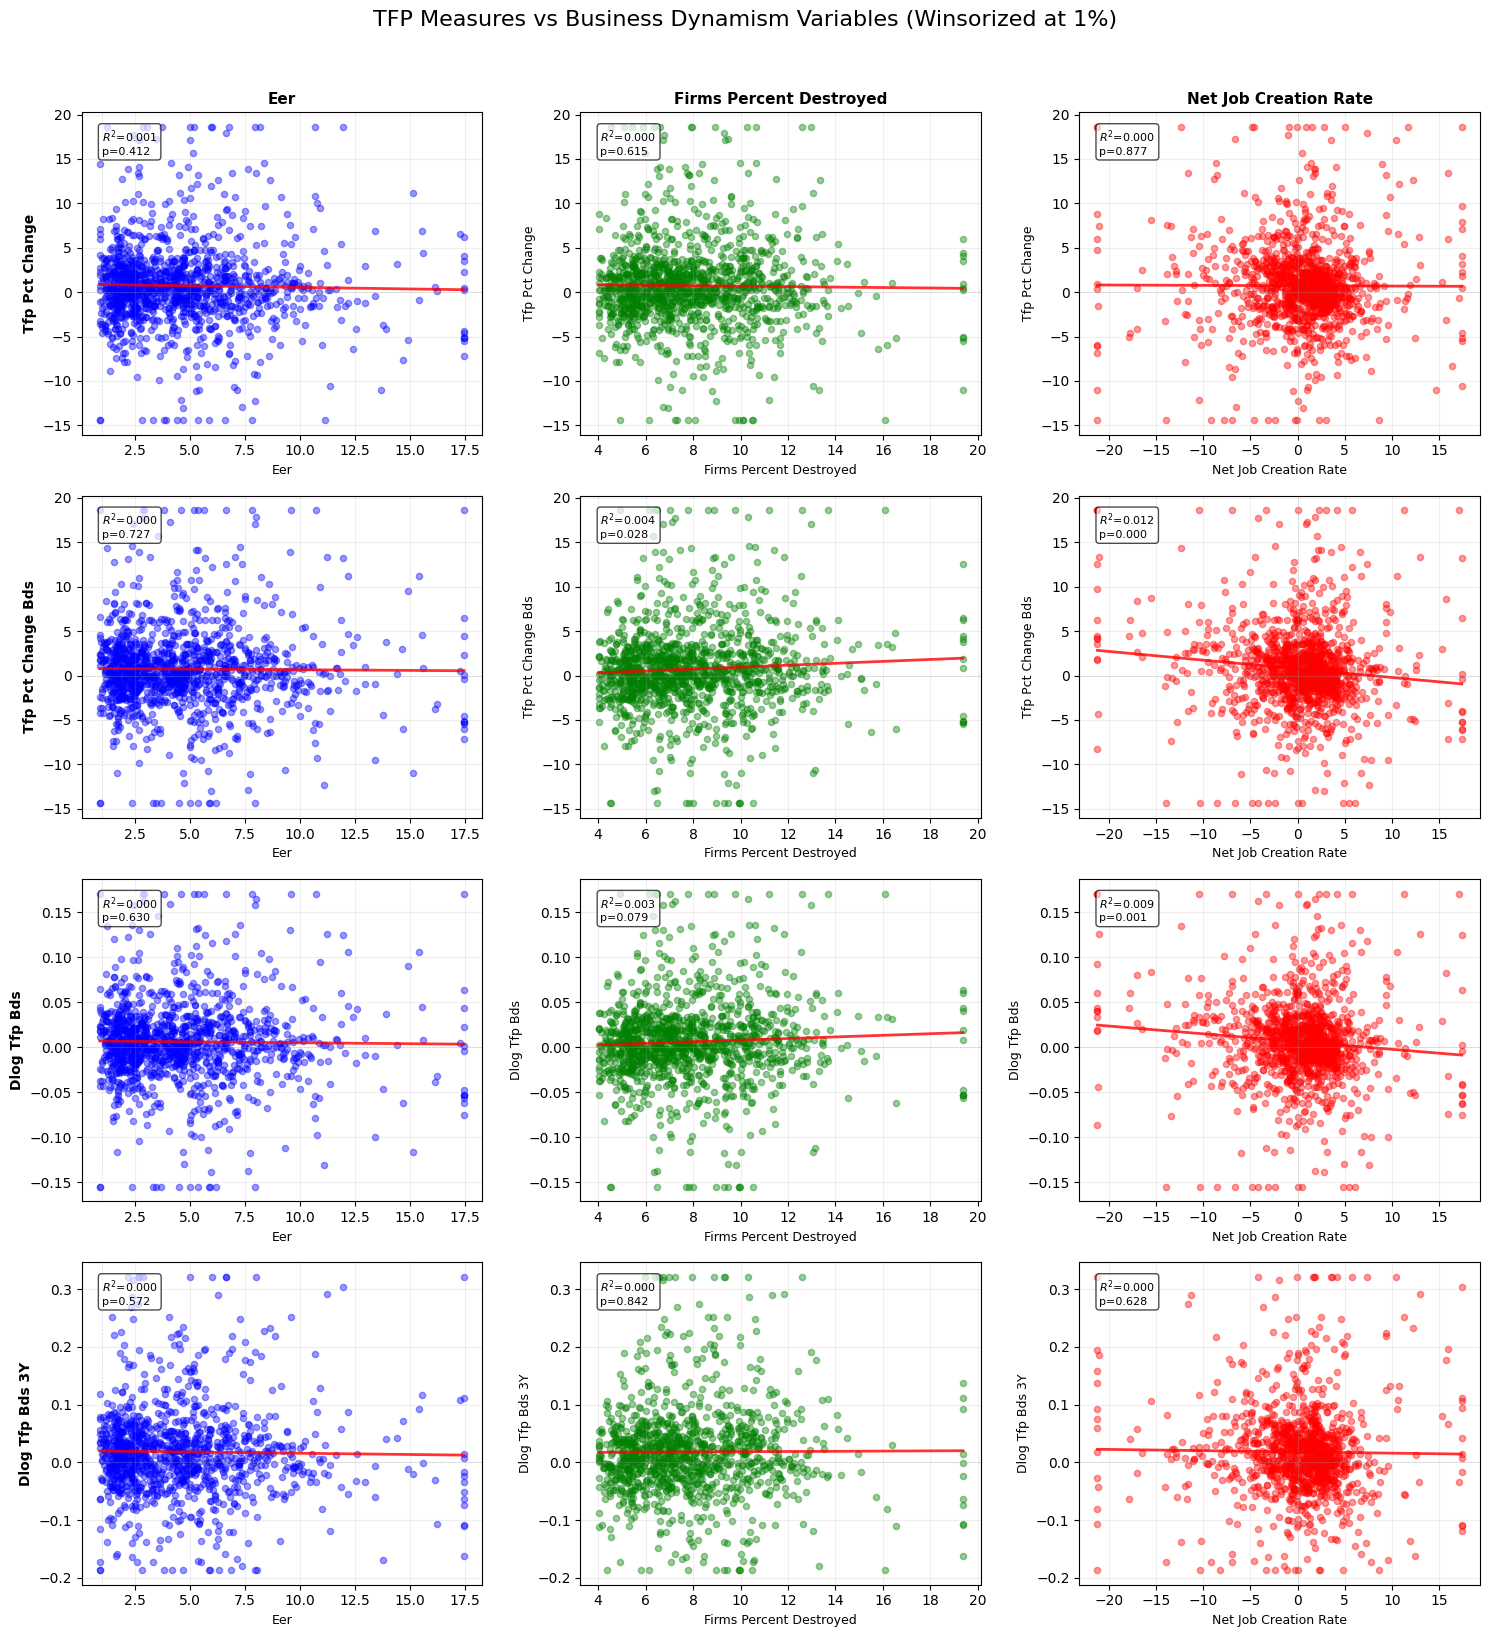


=== Correlation Matrix: All TFP Measures vs Business Dynamism (Winsorized) ===


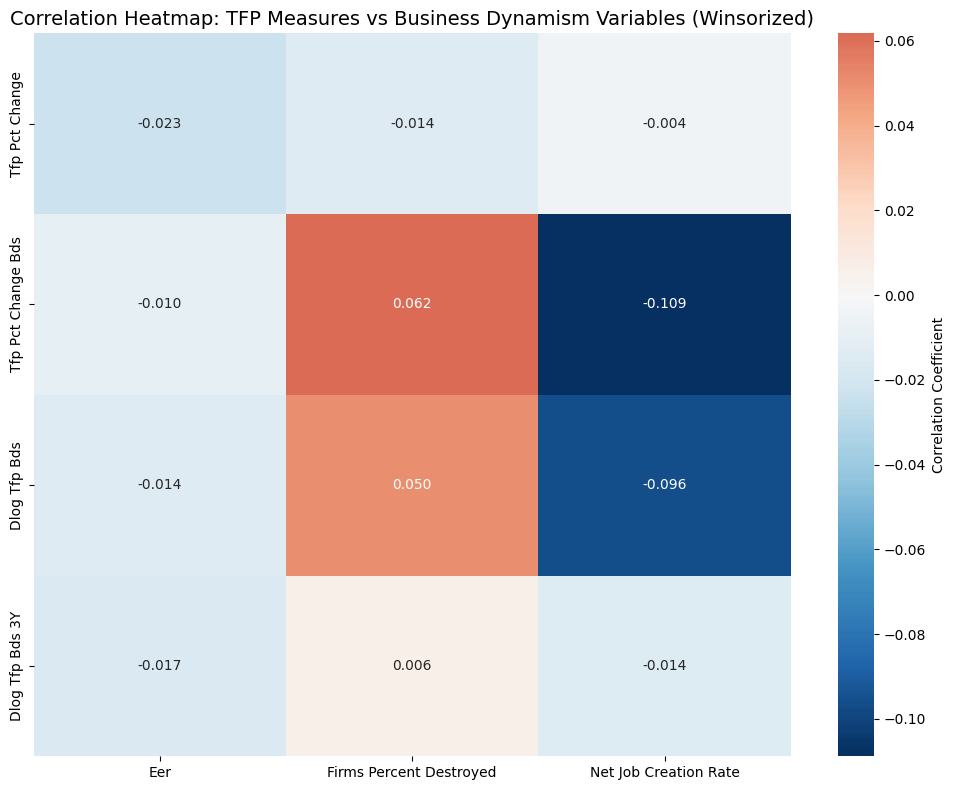


=== Comparison of Correlations: Original vs Winsorized ===
       TFP Measure    Dynamism Variable  Original Corr  Winsorized Corr    Change
    Tfp Pct Change                  Eer      -0.020268        -0.023126 -0.002858
    Tfp Pct Change Firms Percent Destro      -0.023065        -0.014188  0.008876
    Tfp Pct Change Net Job Creation Rat       0.003422        -0.004350 -0.007772
Tfp Pct Change Bds                  Eer      -0.001267        -0.009854 -0.008587
Tfp Pct Change Bds Firms Percent Destro       0.059894         0.061752  0.001858
Tfp Pct Change Bds Net Job Creation Rat      -0.112461        -0.108801  0.003660
      Dlog Tfp Bds                  Eer      -0.002835        -0.013801 -0.010966
      Dlog Tfp Bds Firms Percent Destro       0.045388         0.050274  0.004886
      Dlog Tfp Bds Net Job Creation Rat      -0.099428        -0.096337  0.003091
   Dlog Tfp Bds 3Y                  Eer      -0.027910        -0.016665  0.011245
   Dlog Tfp Bds 3Y Firms Percent Destr

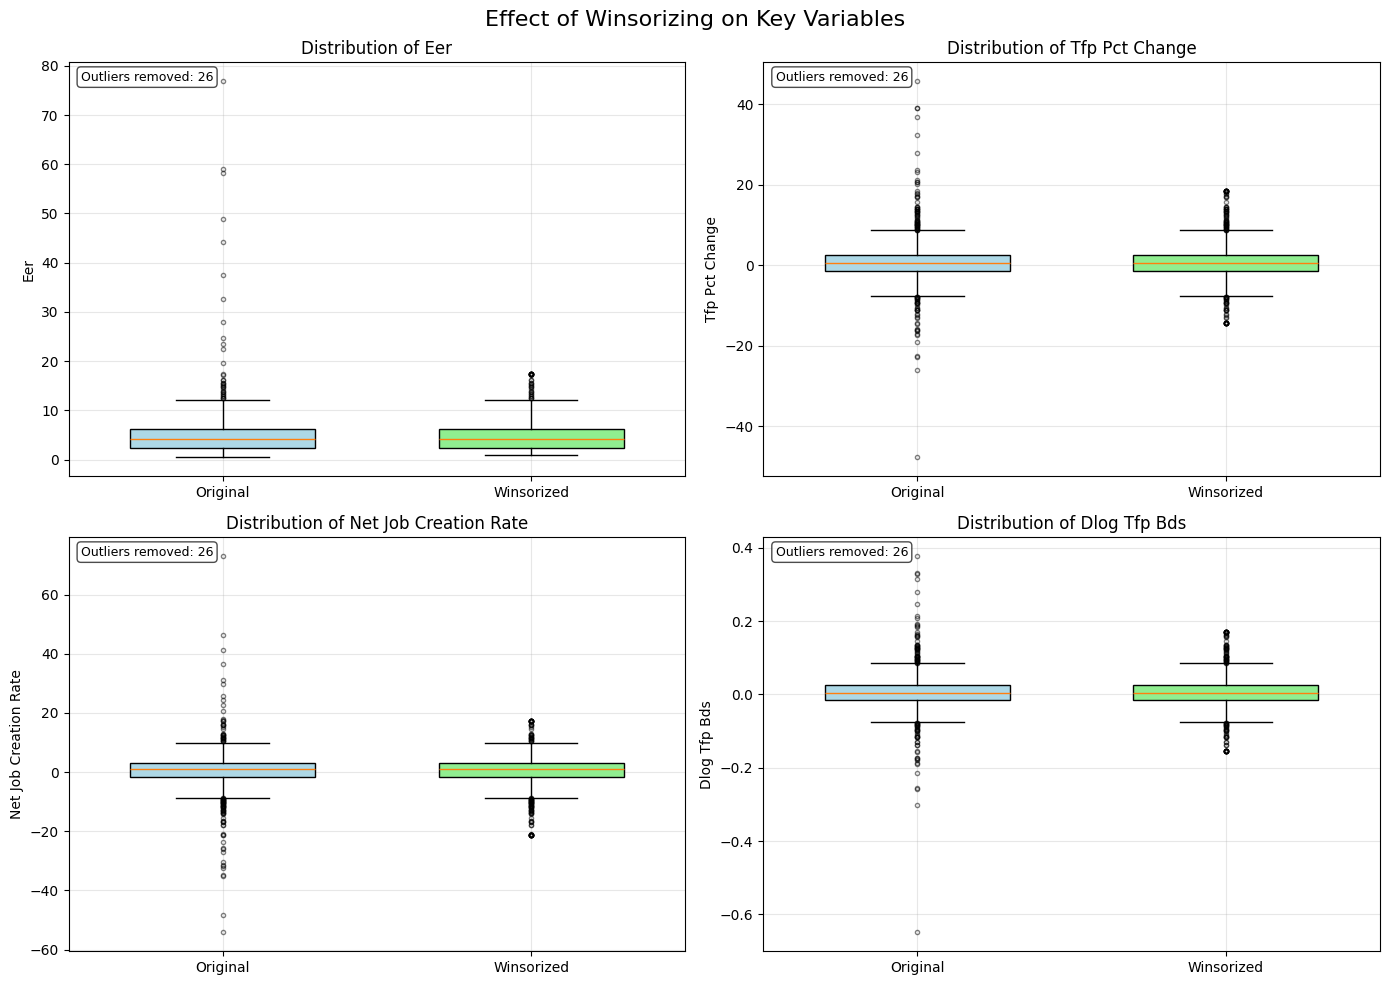


=== Analysis Complete ===
The winsorized analysis removes extreme values at the 1st and 99th percentiles.
This should provide more robust estimates of the relationships between TFP and business dynamism.


In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from scipy.stats.mstats import winsorize

# Create a copy of the dataframe for winsorized analysis
df_winsorized = df.copy()

# Define all TFP measures
tfp_measures = [
    'tfp_pct_change',          # Original TFP percent change
    'tfp_pct_change_bds',      # BDS-aligned TFP percent change
    'dlog_tfp_bds',            # Log difference of TFP (1-year)
    'dlog_tfp_bds_3y'          # Log difference of TFP (3-year)
]

# Define key business dynamism variables to analyze
dynamism_vars = [
    'eer',                          # Entry-to-Exit Ratio
    'firms_percent_created',        # Entry rate
    'firms_percent_destroyed',      # Exit rate
    'net_job_creation_rate'         # Net job creation rate
]

# Filter to only include variables that exist
tfp_measures = [var for var in tfp_measures if var in df.columns]
dynamism_vars = [var for var in dynamism_vars if var in df.columns]

# Winsorize all relevant variables at the 1% level (1st and 99th percentiles)
print("=== Winsorizing Data at 1% Level ===")
print("\nOriginal data ranges:")
for var in tfp_measures + dynamism_vars:
    if var in df_winsorized.columns:
        original_min = df_winsorized[var].min()
        original_max = df_winsorized[var].max()
        print(f"{var:30} Min: {original_min:10.3f} Max: {original_max:10.3f}")

print("\nWinsorized data ranges:")
for var in tfp_measures + dynamism_vars:
    if var in df_winsorized.columns:
        # Get non-null values
        non_null_mask = ~df_winsorized[var].isna()
        non_null_values = df_winsorized.loc[non_null_mask, var]
        
        # Winsorize the non-null values
        winsorized_values = winsorize(non_null_values, limits=[0.01, 0.01])
        
        # Put the winsorized values back
        df_winsorized.loc[non_null_mask, var] = winsorized_values
        
        # Print new ranges
        new_min = df_winsorized[var].min()
        new_max = df_winsorized[var].max()
        print(f"{var:30} Min: {new_min:10.3f} Max: {new_max:10.3f}")

# Create comprehensive scatter plot matrix with winsorized data
fig, axes = plt.subplots(len(tfp_measures), len(dynamism_vars), 
                        figsize=(5*len(dynamism_vars), 4*len(tfp_measures)))

# Handle single row/column cases
if len(tfp_measures) == 1:
    axes = axes.reshape(1, -1)
if len(dynamism_vars) == 1:
    axes = axes.reshape(-1, 1)

# Color scheme
colors = ['blue', 'green', 'red', 'purple', 'orange', 'brown', 'pink', 'gray']

# Plot each combination
for i, tfp_var in enumerate(tfp_measures):
    for j, dyn_var in enumerate(dynamism_vars):
        ax = axes[i, j] if len(tfp_measures) > 1 and len(dynamism_vars) > 1 else axes[i] if len(tfp_measures) > 1 else axes[j] if len(dynamism_vars) > 1 else axes
        
        # Prepare data
        plot_data = df_winsorized[[dyn_var, tfp_var]].dropna()
        
        if len(plot_data) > 0:
            # Scatter plot
            ax.scatter(plot_data[dyn_var], plot_data[tfp_var], 
                      alpha=0.4, s=20, color=colors[j % len(colors)])
            
            # Add regression line if enough data
            if len(plot_data) > 10:
                slope, intercept, r_value, p_value, std_err = stats.linregress(
                    plot_data[dyn_var], plot_data[tfp_var]
                )
                
                # Plot regression line
                x_line = np.linspace(plot_data[dyn_var].min(), plot_data[dyn_var].max(), 100)
                y_line = slope * x_line + intercept
                ax.plot(x_line, y_line, 'r-', linewidth=2, alpha=0.8)
                
                # Add stats to plot
                textstr = f'$R^2$={r_value**2:.3f}\np={p_value:.3f}'
                ax.text(0.05, 0.95, textstr, transform=ax.transAxes, 
                       verticalalignment='top', fontsize=8,
                       bbox=dict(boxstyle='round', facecolor='white', alpha=0.7))
            
            # Formatting
            ax.set_xlabel(dyn_var.replace('_', ' ').title(), fontsize=9)
            ax.set_ylabel(tfp_var.replace('_', ' ').title(), fontsize=9)
            
            # Add reference lines
            ax.axhline(y=0, color='gray', linestyle='--', alpha=0.3, linewidth=0.5)
            if dyn_var == 'eer':
                ax.axvline(x=1, color='gray', linestyle='--', alpha=0.3, linewidth=0.5)
            elif dyn_var == 'net_job_creation_rate':
                ax.axvline(x=0, color='gray', linestyle='--', alpha=0.3, linewidth=0.5)
            
            # Title for top row
            if i == 0:
                ax.set_title(dyn_var.replace('_', ' ').title(), fontsize=11, fontweight='bold')
            
            # Y-axis label for first column
            if j == 0:
                ax.set_ylabel(tfp_var.replace('_', ' ').title(), fontsize=10, fontweight='bold')
            
            ax.grid(True, alpha=0.2)
        else:
            ax.text(0.5, 0.5, 'No data', transform=ax.transAxes, 
                   ha='center', va='center')

plt.suptitle('TFP Measures vs Business Dynamism Variables (Winsorized at 1%)', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

# Correlation heatmap with winsorized data
print("\n=== Correlation Matrix: All TFP Measures vs Business Dynamism (Winsorized) ===")
corr_data = df_winsorized[tfp_measures + dynamism_vars].corr()
corr_subset = corr_data.loc[tfp_measures, dynamism_vars]

fig2, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_subset, annot=True, fmt='.3f', cmap='RdBu_r', center=0,
            cbar_kws={'label': 'Correlation Coefficient'},
            xticklabels=[var.replace('_', ' ').title() for var in dynamism_vars],
            yticklabels=[var.replace('_', ' ').title() for var in tfp_measures])
plt.title('Correlation Heatmap: TFP Measures vs Business Dynamism Variables (Winsorized)', fontsize=14)
plt.tight_layout()
plt.show()

# Comparison of correlations before and after winsorizing
print("\n=== Comparison of Correlations: Original vs Winsorized ===")
comparison_results = []

for tfp_var in tfp_measures:
    for dyn_var in dynamism_vars:
        # Original correlation
        orig_data = df[[tfp_var, dyn_var]].dropna()
        if len(orig_data) > 10:
            orig_corr = orig_data[tfp_var].corr(orig_data[dyn_var])
            
            # Winsorized correlation
            wins_data = df_winsorized[[tfp_var, dyn_var]].dropna()
            wins_corr = wins_data[tfp_var].corr(wins_data[dyn_var])
            
            comparison_results.append({
                'TFP Measure': tfp_var.replace('_', ' ').title()[:20],
                'Dynamism Variable': dyn_var.replace('_', ' ').title()[:20],
                'Original Corr': orig_corr,
                'Winsorized Corr': wins_corr,
                'Change': wins_corr - orig_corr
            })

comparison_df = pd.DataFrame(comparison_results)
print(comparison_df.to_string(index=False))

# Summary statistics table for winsorized data
print("\n=== Summary Statistics for TFP Measures (Winsorized) ===")
tfp_stats = []
for tfp_var in tfp_measures:
    data = df_winsorized[tfp_var].dropna()
    tfp_stats.append({
        'TFP Measure': tfp_var.replace('_', ' ').title(),
        'Mean': data.mean(),
        'Std Dev': data.std(),
        'Min': data.min(),
        'Max': data.max(),
        'Skewness': data.skew(),
        'N': len(data)
    })

tfp_stats_df = pd.DataFrame(tfp_stats)
print(tfp_stats_df.to_string(index=False))

# Regression results summary with winsorized data
print("\n=== Regression Results Summary (Winsorized) ===")
print("Significant relationships (p < 0.05):")
significant_results = []

for tfp_var in tfp_measures:
    for dyn_var in dynamism_vars:
        plot_data = df_winsorized[[dyn_var, tfp_var]].dropna()
        if len(plot_data) > 10:
            slope, intercept, r_value, p_value, std_err = stats.linregress(
                plot_data[dyn_var], plot_data[tfp_var]
            )
            if p_value < 0.05:
                significant_results.append({
                    'TFP': tfp_var.replace('_', ' ').title()[:20],
                    'Dynamism': dyn_var.replace('_', ' ').title()[:20],
                    'Slope': slope,
                    'R²': r_value**2,
                    'p-value': p_value
                })

if significant_results:
    sig_df = pd.DataFrame(significant_results)
    print(sig_df.to_string(index=False))
else:
    print("No significant relationships found at p < 0.05 level")

# Box plots to show the effect of winsorizing
fig3, axes3 = plt.subplots(2, 2, figsize=(14, 10))

# Select key variables to visualize
key_vars = ['eer', 'tfp_pct_change', 'net_job_creation_rate', 'dlog_tfp_bds']
key_vars = [v for v in key_vars if v in df.columns][:4]

for idx, var in enumerate(key_vars):
    ax = axes3[idx // 2, idx % 2]
    
    # Prepare data
    orig_data = df[var].dropna()
    wins_data = df_winsorized[var].dropna()
    
    # Create box plots
    box_data = [orig_data, wins_data]
    positions = [1, 2]
    
    bp = ax.boxplot(box_data, positions=positions, widths=0.6, patch_artist=True,
                    showfliers=True, flierprops=dict(marker='o', markersize=3, alpha=0.5))
    
    # Color the boxes
    colors = ['lightblue', 'lightgreen']
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
    
    # Labels and formatting
    ax.set_xticklabels(['Original', 'Winsorized'])
    ax.set_ylabel(var.replace('_', ' ').title())
    ax.set_title(f'Distribution of {var.replace("_", " ").title()}')
    ax.grid(True, alpha=0.3)
    
    # Add text with outlier counts
    n_outliers_orig = len(orig_data[(orig_data < orig_data.quantile(0.01)) | 
                                   (orig_data > orig_data.quantile(0.99))])
    ax.text(0.02, 0.98, f'Outliers removed: {n_outliers_orig}', 
            transform=ax.transAxes, verticalalignment='top', fontsize=9,
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.7))

plt.suptitle('Effect of Winsorizing on Key Variables', fontsize=16)
plt.tight_layout()
plt.show()

print("\n=== Analysis Complete ===")
print("The winsorized analysis removes extreme values at the 1st and 99th percentiles.")
print("This should provide more robust estimates of the relationships between TFP and business dynamism.")

=== Analysis for Computer and electronic products Industry ===
Total observations: 36
Year range: 1987 - 2022


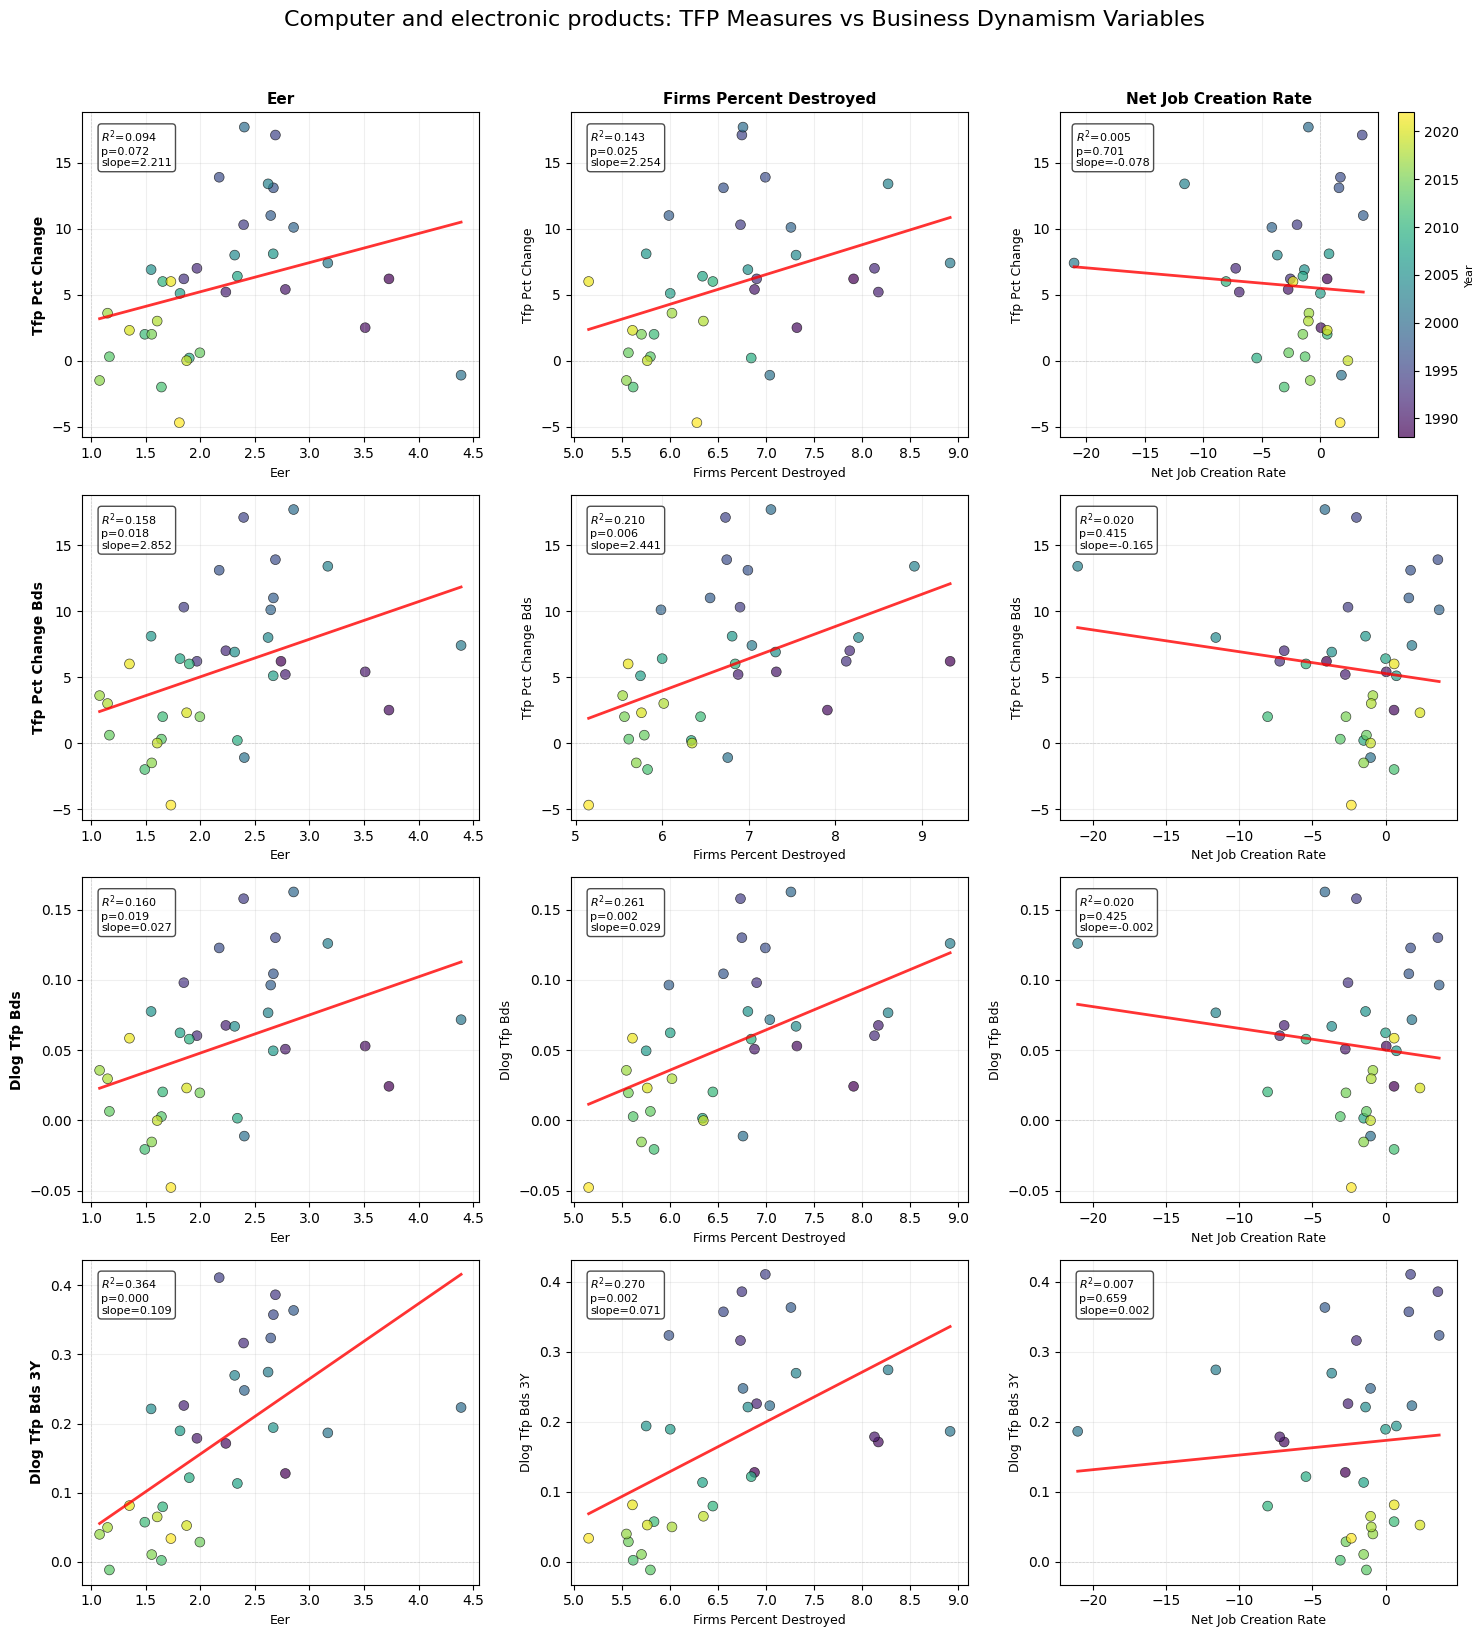

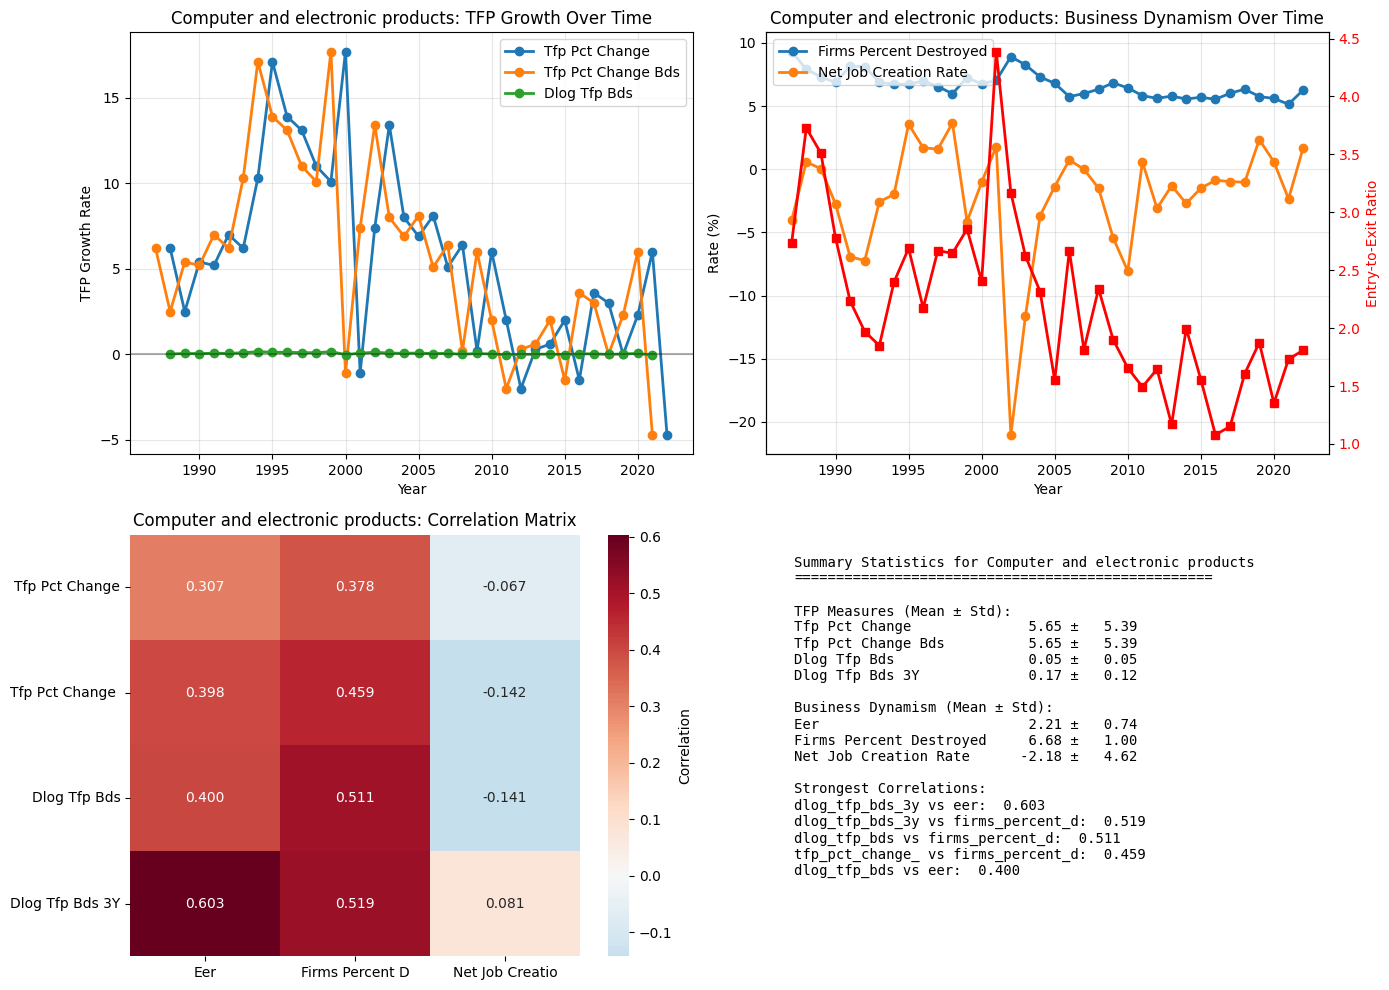


=== Detailed Regression Results ===

Dependent Variable: tfp_pct_change
------------------------------------------------------------
eer                            Slope:   2.2109  R²:  0.094  p-value:  0.072  N:  35
firms_percent_destroyed        Slope:   2.2540  R²:  0.143  p-value:  0.025  N:  35
net_job_creation_rate          Slope:  -0.0776  R²:  0.005  p-value:  0.701  N:  35

Dependent Variable: tfp_pct_change_bds
------------------------------------------------------------
eer                            Slope:   2.8516  R²:  0.158  p-value:  0.018  N:  35
firms_percent_destroyed        Slope:   2.4415  R²:  0.210  p-value:  0.006  N:  35
net_job_creation_rate          Slope:  -0.1655  R²:  0.020  p-value:  0.415  N:  35

Dependent Variable: dlog_tfp_bds
------------------------------------------------------------
eer                            Slope:   0.0272  R²:  0.160  p-value:  0.019  N:  34
firms_percent_destroyed        Slope:   0.0286  R²:  0.261  p-value:  0.002  N:  3

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

# Filter for Computer and electronic products industry
industry_name = 'Computer and electronic products'
comp_elec_df = df[df['Industry'] == industry_name].copy()

print(f"=== Analysis for {industry_name} Industry ===")
print(f"Total observations: {len(comp_elec_df)}")
print(f"Year range: {comp_elec_df['year'].min()} - {comp_elec_df['year'].max()}")

# Define variables
tfp_measures = [
    'tfp_pct_change',
    'tfp_pct_change_bds',
    'dlog_tfp_bds',
    'dlog_tfp_bds_3y'
]

dynamism_vars = [
    'eer',
    'firms_percent_created',
    'firms_percent_destroyed',
    'net_job_creation_rate'
]

# Filter to existing variables
tfp_measures = [var for var in tfp_measures if var in comp_elec_df.columns]
dynamism_vars = [var for var in dynamism_vars if var in comp_elec_df.columns]

# Create scatter plot matrix for this industry
fig, axes = plt.subplots(len(tfp_measures), len(dynamism_vars), 
                        figsize=(5*len(dynamism_vars), 4*len(tfp_measures)))

# Handle single row/column cases
if len(tfp_measures) == 1:
    axes = axes.reshape(1, -1)
if len(dynamism_vars) == 1:
    axes = axes.reshape(-1, 1)

# Color scheme
colors = ['darkblue', 'darkgreen', 'darkred', 'purple']

# Plot each combination
for i, tfp_var in enumerate(tfp_measures):
    for j, dyn_var in enumerate(dynamism_vars):
        ax = axes[i, j] if len(tfp_measures) > 1 and len(dynamism_vars) > 1 else axes[i] if len(tfp_measures) > 1 else axes[j] if len(dynamism_vars) > 1 else axes
        
        # Prepare data
        plot_data = comp_elec_df[[dyn_var, tfp_var, 'year']].dropna()
        
        if len(plot_data) > 0:
            # Scatter plot with year coloring
            scatter = ax.scatter(plot_data[dyn_var], plot_data[tfp_var], 
                               c=plot_data['year'], cmap='viridis',
                               alpha=0.7, s=50, edgecolors='black', linewidth=0.5)
            
            # Add regression line if enough data
            if len(plot_data) > 5:
                slope, intercept, r_value, p_value, std_err = stats.linregress(
                    plot_data[dyn_var], plot_data[tfp_var]
                )
                
                # Plot regression line
                x_line = np.linspace(plot_data[dyn_var].min(), plot_data[dyn_var].max(), 100)
                y_line = slope * x_line + intercept
                ax.plot(x_line, y_line, 'r-', linewidth=2, alpha=0.8)
                
                # Add stats to plot
                textstr = f'$R^2$={r_value**2:.3f}\np={p_value:.3f}\nslope={slope:.3f}'
                ax.text(0.05, 0.95, textstr, transform=ax.transAxes, 
                       verticalalignment='top', fontsize=8,
                       bbox=dict(boxstyle='round', facecolor='white', alpha=0.7))
            
            # Formatting
            ax.set_xlabel(dyn_var.replace('_', ' ').title(), fontsize=9)
            ax.set_ylabel(tfp_var.replace('_', ' ').title(), fontsize=9)
            
            # Add reference lines
            ax.axhline(y=0, color='gray', linestyle='--', alpha=0.3, linewidth=0.5)
            if dyn_var == 'eer':
                ax.axvline(x=1, color='gray', linestyle='--', alpha=0.3, linewidth=0.5)
            elif dyn_var == 'net_job_creation_rate':
                ax.axvline(x=0, color='gray', linestyle='--', alpha=0.3, linewidth=0.5)
            
            # Title for top row
            if i == 0:
                ax.set_title(dyn_var.replace('_', ' ').title(), fontsize=11, fontweight='bold')
            
            # Y-axis label for first column
            if j == 0:
                ax.set_ylabel(tfp_var.replace('_', ' ').title(), fontsize=10, fontweight='bold')
            
            ax.grid(True, alpha=0.2)
            
            # Add colorbar to the rightmost plot
            if j == len(dynamism_vars) - 1 and i == 0:
                cbar = plt.colorbar(scatter, ax=ax)
                cbar.set_label('Year', fontsize=8)
        else:
            ax.text(0.5, 0.5, 'No data', transform=ax.transAxes, 
                   ha='center', va='center')

plt.suptitle(f'{industry_name}: TFP Measures vs Business Dynamism Variables', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

# Time series plots
fig2, axes2 = plt.subplots(2, 2, figsize=(14, 10))

# 1. TFP measures over time
ax1 = axes2[0, 0]
for tfp_var in tfp_measures[:3]:  # Limit to first 3 for clarity
    data = comp_elec_df[['year', tfp_var]].dropna()
    ax1.plot(data['year'], data[tfp_var], marker='o', label=tfp_var.replace('_', ' ').title(), linewidth=2)
ax1.set_xlabel('Year')
ax1.set_ylabel('TFP Growth Rate')
ax1.set_title(f'{industry_name}: TFP Growth Over Time')
ax1.legend()
ax1.grid(True, alpha=0.3)
ax1.axhline(y=0, color='black', linestyle='-', alpha=0.3)

# 2. Business dynamism measures over time
ax2 = axes2[0, 1]
for dyn_var in dynamism_vars:
    data = comp_elec_df[['year', dyn_var]].dropna()
    if dyn_var == 'eer':
        ax2_twin = ax2.twinx()
        ax2_twin.plot(data['year'], data[dyn_var], marker='s', 
                     label=dyn_var.replace('_', ' ').title(), linewidth=2, color='red')
        ax2_twin.set_ylabel('Entry-to-Exit Ratio', color='red')
        ax2_twin.tick_params(axis='y', labelcolor='red')
    else:
        ax2.plot(data['year'], data[dyn_var], marker='o', 
                label=dyn_var.replace('_', ' ').title(), linewidth=2)
ax2.set_xlabel('Year')
ax2.set_ylabel('Rate (%)')
ax2.set_title(f'{industry_name}: Business Dynamism Over Time')
ax2.legend(loc='upper left')
ax2.grid(True, alpha=0.3)

# 3. Correlation heatmap for this industry
ax3 = axes2[1, 0]
corr_data = comp_elec_df[tfp_measures + dynamism_vars].corr()
corr_subset = corr_data.loc[tfp_measures, dynamism_vars]

sns.heatmap(corr_subset, annot=True, fmt='.3f', cmap='RdBu_r', center=0,
            ax=ax3, cbar_kws={'label': 'Correlation'},
            xticklabels=[var.replace('_', ' ').title()[:15] for var in dynamism_vars],
            yticklabels=[var.replace('_', ' ').title()[:15] for var in tfp_measures])
ax3.set_title(f'{industry_name}: Correlation Matrix')

# 4. Summary statistics
ax4 = axes2[1, 1]
ax4.axis('off')

# Create summary text
summary_text = f"Summary Statistics for {industry_name}\n"
summary_text += "="*50 + "\n\n"

# TFP statistics
summary_text += "TFP Measures (Mean ± Std):\n"
for tfp_var in tfp_measures:
    data = comp_elec_df[tfp_var].dropna()
    if len(data) > 0:
        summary_text += f"{tfp_var.replace('_', ' ').title()[:25]:25} {data.mean():6.2f} ± {data.std():6.2f}\n"

summary_text += "\nBusiness Dynamism (Mean ± Std):\n"
for dyn_var in dynamism_vars:
    data = comp_elec_df[dyn_var].dropna()
    if len(data) > 0:
        summary_text += f"{dyn_var.replace('_', ' ').title()[:25]:25} {data.mean():6.2f} ± {data.std():6.2f}\n"

# Add correlation summary
summary_text += "\nStrongest Correlations:\n"
all_corrs = []
for tfp_var in tfp_measures:
    for dyn_var in dynamism_vars:
        valid_data = comp_elec_df[[tfp_var, dyn_var]].dropna()
        if len(valid_data) > 5:
            corr = valid_data[tfp_var].corr(valid_data[dyn_var])
            all_corrs.append((tfp_var, dyn_var, corr))

# Sort by absolute correlation
all_corrs.sort(key=lambda x: abs(x[2]), reverse=True)
for tfp_var, dyn_var, corr in all_corrs[:5]:
    summary_text += f"{tfp_var[:15]} vs {dyn_var[:15]}: {corr:6.3f}\n"

ax4.text(0.05, 0.95, summary_text, transform=ax4.transAxes, 
         verticalalignment='top', fontsize=10, family='monospace')

plt.tight_layout()
plt.show()

# Detailed regression analysis
print("\n=== Detailed Regression Results ===")
for tfp_var in tfp_measures:
    print(f"\nDependent Variable: {tfp_var}")
    print("-" * 60)
    for dyn_var in dynamism_vars:
        plot_data = comp_elec_df[[dyn_var, tfp_var]].dropna()
        if len(plot_data) > 5:
            slope, intercept, r_value, p_value, std_err = stats.linregress(
                plot_data[dyn_var], plot_data[tfp_var]
            )
            print(f"{dyn_var:30} Slope: {slope:8.4f}  R²: {r_value**2:6.3f}  p-value: {p_value:6.3f}  N: {len(plot_data):3d}")

# Compare with overall sample
print("\n=== Comparison with Full Sample ===")
print(f"Industry: {industry_name}")
print(f"Industry observations: {len(comp_elec_df)}")
print(f"Total sample observations: {len(df)}")
print(f"Industry share: {len(comp_elec_df)/len(df)*100:.1f}%")

# Check for any notable patterns
print("\n=== Notable Patterns ===")
# Check if TFP is consistently positive/negative
avg_tfp = comp_elec_df['tfp_pct_change'].mean()
if avg_tfp > 1:
    print(f"- High average TFP growth: {avg_tfp:.2f}% (well above sample average)")
elif avg_tfp < -1:
    print(f"- Low average TFP growth: {avg_tfp:.2f}% (well below sample average)")

# Check business dynamism trends
recent_years = comp_elec_df[comp_elec_df['year'] >= comp_elec_df['year'].max() - 5]
if len(recent_years) > 0:
    recent_njcr = recent_years['net_job_creation_rate'].mean()
    overall_njcr = comp_elec_df['net_job_creation_rate'].mean()
    if abs(recent_njcr - overall_njcr) > 2:
        trend = "increasing" if recent_njcr > overall_njcr else "decreasing"
        print(f"- Net job creation rate {trend} in recent years")

# Export data for further analysis
comp_elec_summary = comp_elec_df[['year'] + tfp_measures + dynamism_vars].describe()
print("\n=== Descriptive Statistics ===")
print(comp_elec_summary)

Running industry-specific regressions...

Successfully estimated models for 36 industries


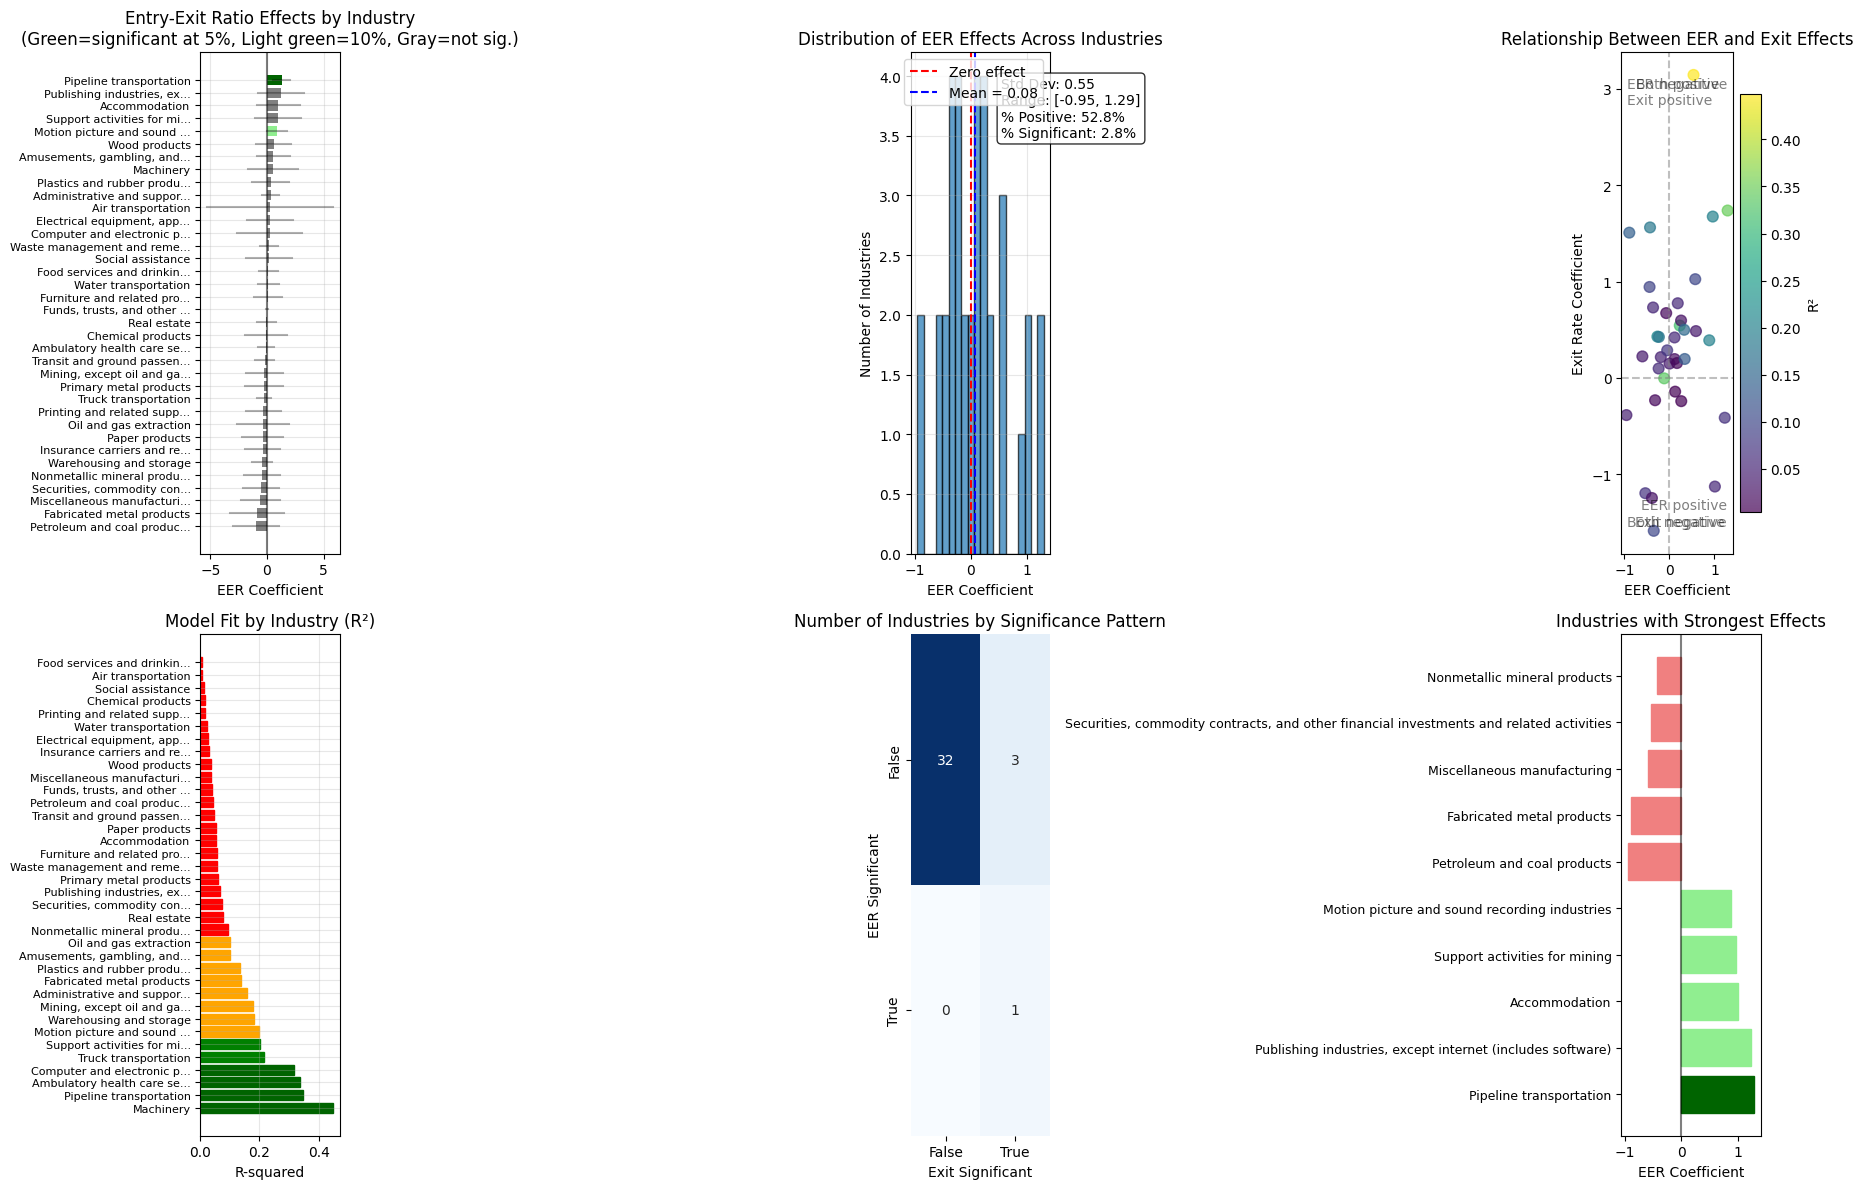


=== SUMMARY OF INDUSTRY HETEROGENEITY ===
Number of industries analyzed: 36
Mean EER coefficient: 0.078
Std dev of EER coefficients: 0.552
Coefficient of variation: 7.04

=== STATISTICAL SIGNIFICANCE ===
Industries with significant EER effect (p<0.05): 1 (2.8%)
Industries with significant Exit effect (p<0.05): 4 (11.1%)

=== EXTREME CASES ===

Most positive EER effects:
Pipeline transportation                  Coef:   1.29 (p=0.002)
Publishing industries, except internet (includes software) Coef:   1.23 (p=0.244)
Accommodation                            Coef:   1.01 (p=0.311)

Most negative EER effects:
Petroleum and coal products              Coef:  -0.95 (p=0.359)
Fabricated metal products                Coef:  -0.89 (p=0.475)
Miscellaneous manufacturing              Coef:  -0.60 (p=0.503)

=== TESTING FOR SYSTEMATIC PATTERNS ===

Pooled R²: 0.048
Industry FE R²: 0.102
Industry interactions R²: 0.171

Wald test for coefficient heterogeneity:
Chi-squared statistic: 101.20, df: 70, p-

In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.formula.api as smf

# Industry-by-industry analysis
print("Running industry-specific regressions...")
industry_results = []

for industry in df['Industry'].unique():
    ind_df = df[df['Industry'] == industry].dropna(subset=['tfp_pct_change_bds', 'eer', 'firms_percent_destroyed', 'year'])
    
    if len(ind_df) > 20:  # Minimum observations for reliable estimates
        try:
            # Run regression for this industry
            model = smf.ols('tfp_pct_change_bds ~ eer + firms_percent_destroyed + year', 
                            data=ind_df).fit()
            
            industry_results.append({
                'Industry': industry,
                'N': len(ind_df),
                'EER_coef': model.params.get('eer', np.nan),
                'EER_pval': model.pvalues.get('eer', np.nan),
                'EER_se': model.bse.get('eer', np.nan),
                'Exit_coef': model.params.get('firms_percent_destroyed', np.nan),
                'Exit_pval': model.pvalues.get('firms_percent_destroyed', np.nan),
                'Exit_se': model.bse.get('firms_percent_destroyed', np.nan),
                'R_squared': model.rsquared,
                'Adj_R_squared': model.rsquared_adj
            })
        except:
            print(f"Could not estimate model for {industry}")

# Convert to DataFrame for analysis
results_df = pd.DataFrame(industry_results)
print(f"\nSuccessfully estimated models for {len(results_df)} industries")

# Sort by EER coefficient for visualization
results_df = results_df.sort_values('EER_coef')

# Create comprehensive visualization
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# 1. EER Coefficients by Industry
ax1 = axes[0, 0]
# Color by significance
colors = ['darkgreen' if p < 0.05 else 'lightgreen' if p < 0.10 else 'gray' 
          for p in results_df['EER_pval']]
bars1 = ax1.barh(range(len(results_df)), results_df['EER_coef'], color=colors)
ax1.set_yticks(range(len(results_df)))
ax1.set_yticklabels([ind[:25] + '...' if len(ind) > 25 else ind 
                     for ind in results_df['Industry']], fontsize=8)
ax1.axvline(x=0, color='black', linestyle='-', alpha=0.5)
ax1.set_xlabel('EER Coefficient')
ax1.set_title('Entry-Exit Ratio Effects by Industry\n(Green=significant at 5%, Light green=10%, Gray=not sig.)')
ax1.grid(True, alpha=0.3)

# Add confidence intervals
for i, (coef, se) in enumerate(zip(results_df['EER_coef'], results_df['EER_se'])):
    ax1.plot([coef - 1.96*se, coef + 1.96*se], [i, i], 'k-', alpha=0.3)

# 2. Distribution of EER coefficients
ax2 = axes[0, 1]
ax2.hist(results_df['EER_coef'], bins=20, edgecolor='black', alpha=0.7)
ax2.axvline(x=0, color='red', linestyle='--', label='Zero effect')
ax2.axvline(x=results_df['EER_coef'].mean(), color='blue', linestyle='--', 
            label=f'Mean = {results_df["EER_coef"].mean():.2f}')
ax2.set_xlabel('EER Coefficient')
ax2.set_ylabel('Number of Industries')
ax2.set_title('Distribution of EER Effects Across Industries')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Add text box with statistics
textstr = f'Std Dev: {results_df["EER_coef"].std():.2f}\n'
textstr += f'Range: [{results_df["EER_coef"].min():.2f}, {results_df["EER_coef"].max():.2f}]\n'
textstr += f'% Positive: {(results_df["EER_coef"] > 0).mean()*100:.1f}%\n'
textstr += f'% Significant: {(results_df["EER_pval"] < 0.05).mean()*100:.1f}%'
ax2.text(0.65, 0.95, textstr, transform=ax2.transAxes, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# 3. EER vs Exit Rate coefficients
ax3 = axes[0, 2]
# Color by R-squared
scatter = ax3.scatter(results_df['EER_coef'], results_df['Exit_coef'], 
                     c=results_df['R_squared'], cmap='viridis', s=60, alpha=0.7)
ax3.axhline(y=0, color='gray', linestyle='--', alpha=0.5)
ax3.axvline(x=0, color='gray', linestyle='--', alpha=0.5)
ax3.set_xlabel('EER Coefficient')
ax3.set_ylabel('Exit Rate Coefficient')
ax3.set_title('Relationship Between EER and Exit Effects')
plt.colorbar(scatter, ax=ax3, label='R²')

# Add quadrant labels
ax3.text(0.95, 0.95, 'Both positive', transform=ax3.transAxes, ha='right', va='top', alpha=0.5)
ax3.text(0.05, 0.95, 'EER negative\nExit positive', transform=ax3.transAxes, ha='left', va='top', alpha=0.5)
ax3.text(0.05, 0.05, 'Both negative', transform=ax3.transAxes, ha='left', va='bottom', alpha=0.5)
ax3.text(0.95, 0.05, 'EER positive\nExit negative', transform=ax3.transAxes, ha='right', va='bottom', alpha=0.5)

# 4. Model fit by industry
ax4 = axes[1, 0]
results_df_sorted = results_df.sort_values('R_squared', ascending=False)
bars4 = ax4.barh(range(len(results_df_sorted)), results_df_sorted['R_squared'])
ax4.set_yticks(range(len(results_df_sorted)))
ax4.set_yticklabels([ind[:25] + '...' if len(ind) > 25 else ind 
                     for ind in results_df_sorted['Industry']], fontsize=8)
ax4.set_xlabel('R-squared')
ax4.set_title('Model Fit by Industry (R²)')
ax4.grid(True, alpha=0.3)

# Color bars by R-squared value
for i, (bar, r2) in enumerate(zip(bars4, results_df_sorted['R_squared'])):
    if r2 > 0.3:
        bar.set_color('darkgreen')
    elif r2 > 0.2:
        bar.set_color('green')
    elif r2 > 0.1:
        bar.set_color('orange')
    else:
        bar.set_color('red')

# 5. Significance testing
ax5 = axes[1, 1]
# Create 2x2 table of significance
sig_table = pd.crosstab(results_df['EER_pval'] < 0.05, 
                       results_df['Exit_pval'] < 0.05,
                       rownames=['EER Significant'],
                       colnames=['Exit Significant'])
sns.heatmap(sig_table, annot=True, fmt='d', cmap='Blues', ax=ax5, cbar=False)
ax5.set_title('Number of Industries by Significance Pattern')

# 6. Top and bottom performers
ax6 = axes[1, 2]
# Get top 5 positive and negative EER effects
top5 = results_df.nlargest(5, 'EER_coef')
bottom5 = results_df.nsmallest(5, 'EER_coef')
top_bottom = pd.concat([top5, bottom5])

y_pos = range(len(top_bottom))
bars6 = ax6.barh(y_pos, top_bottom['EER_coef'])
ax6.set_yticks(y_pos)
ax6.set_yticklabels(top_bottom['Industry'], fontsize=9)
ax6.axvline(x=0, color='black', linestyle='-', alpha=0.5)
ax6.set_xlabel('EER Coefficient')
ax6.set_title('Industries with Strongest Effects')

# Color by direction and significance
for i, (coef, pval) in enumerate(zip(top_bottom['EER_coef'], top_bottom['EER_pval'])):
    if pval < 0.05:
        bars6[i].set_color('darkgreen' if coef > 0 else 'darkred')
    else:
        bars6[i].set_color('lightgreen' if coef > 0 else 'lightcoral')

plt.tight_layout()
plt.show()

# Print detailed summary
print("\n=== SUMMARY OF INDUSTRY HETEROGENEITY ===")
print(f"Number of industries analyzed: {len(results_df)}")
print(f"Mean EER coefficient: {results_df['EER_coef'].mean():.3f}")
print(f"Std dev of EER coefficients: {results_df['EER_coef'].std():.3f}")
print(f"Coefficient of variation: {results_df['EER_coef'].std()/abs(results_df['EER_coef'].mean()):.2f}")

print("\n=== STATISTICAL SIGNIFICANCE ===")
print(f"Industries with significant EER effect (p<0.05): {(results_df['EER_pval'] < 0.05).sum()} ({(results_df['EER_pval'] < 0.05).mean()*100:.1f}%)")
print(f"Industries with significant Exit effect (p<0.05): {(results_df['Exit_pval'] < 0.05).sum()} ({(results_df['Exit_pval'] < 0.05).mean()*100:.1f}%)")

print("\n=== EXTREME CASES ===")
print("\nMost positive EER effects:")
for _, row in results_df.nlargest(3, 'EER_coef').iterrows():
    print(f"{row['Industry']:40} Coef: {row['EER_coef']:6.2f} (p={row['EER_pval']:.3f})")

print("\nMost negative EER effects:")
for _, row in results_df.nsmallest(3, 'EER_coef').iterrows():
    print(f"{row['Industry']:40} Coef: {row['EER_coef']:6.2f} (p={row['EER_pval']:.3f})")

# Test for systematic patterns
print("\n=== TESTING FOR SYSTEMATIC PATTERNS ===")

# 1. Is there more variation across industries than within?
# Calculate F-statistic for industry heterogeneity
pooled_model = smf.ols('tfp_pct_change_bds ~ eer + firms_percent_destroyed + C(year)', data=df).fit()
industry_fe_model = smf.ols('tfp_pct_change_bds ~ eer + firms_percent_destroyed + C(year) + C(Industry)', data=df).fit()
industry_interact_model = smf.ols('tfp_pct_change_bds ~ eer*C(Industry) + firms_percent_destroyed*C(Industry) + C(year) + C(Industry)', data=df).fit()

print(f"\nPooled R²: {pooled_model.rsquared:.3f}")
print(f"Industry FE R²: {industry_fe_model.rsquared:.3f}")
print(f"Industry interactions R²: {industry_interact_model.rsquared:.3f}")

# 2. Statistical test for coefficient heterogeneity
from scipy import stats as scipy_stats
wald_stat = 2 * (industry_interact_model.llf - industry_fe_model.llf)
df_diff = len(industry_interact_model.params) - len(industry_fe_model.params)
p_value = 1 - scipy_stats.chi2.cdf(wald_stat, df_diff)
print(f"\nWald test for coefficient heterogeneity:")
print(f"Chi-squared statistic: {wald_stat:.2f}, df: {df_diff}, p-value: {p_value:.4f}")

if p_value < 0.05:
    print("CONCLUSION: There is statistically significant heterogeneity in effects across industries!")
else:
    print("CONCLUSION: Cannot reject homogeneous effects across industries.")

# Export results for further analysis
results_df.to_csv('industry_regression_results.csv', index=False)
print("\nResults saved to 'industry_regression_results.csv'")

Fixed Effects

In [91]:
df.head()

,year,NAICS,firms,estabs,emp,denom,estabs_entry,estabs_entry_rate,estabs_exit,estabs_exit_rate,job_creation,job_creation_births,job_creation_continuers,job_creation_rate_births,job_creation_rate,job_destruction,job_destruction_deaths,job_destruction_continuers,job_destruction_rate_deaths,job_destruction_rate,net_job_creation,net_job_creation_rate,reallocation_rate,firmdeath_firms,firmdeath_estabs,firmdeath_emp,Industry,Basis,weight,tfp_pct_change,tfp_index_2017,firms_percent_destroyed,eer,pct_high_growth_emp,tfp_log,tfp_diff3,tfp_ann_pct,tfp_index_bds,tfp_pct_change_bds,tfp_log_bds,dlog_tfp_bds,dlog_tfp_bds_3y,period
34,1987,721,37088,42640,1330072,1329612,6134,14.458,5708,13.454,264472,136740,127732,10.284,19.891,263230,120422,142808,9.057,19.798,1242,0.093,39.595,3998,4086,69597,Accommodation,All workers,0.017146,NaN,77.732,10.779767,10.284203,10.949633,4.353267,NaN,NaN,76.259,-1.9,4.334135,NaN,NaN,NaN
70,1988,721,37630,43842,1369438,1351841,6190,14.303,5064,11.701,286319,135376,150943,10.014,21.180,252129,118455,133674,8.762,18.651,34190,2.529,37.302,3565,3669,69862,Accommodation,All workers,0.017030,-1.9,76.259,9.473824,10.014195,10.159788,4.334135,NaN,NaN,75.855,-0.5,4.328824,-0.005312,NaN,NaN
106,1989,721,37936,44581,1450998,1412370,5805,13.125,5101,11.533,285977,132786,153191,9.402,20.248,210536,104055,106481,7.367,14.907,75441,5.341,29.813,3694,3780,65248,Accommodation,All workers,0.016604,-0.5,75.855,9.737453,9.401644,9.145981,4.328824,NaN,NaN,75.680,-0.2,4.326514,-0.002310,NaN,NaN
142,1990,721,38063,45024,1495832,1474535,5375,11.995,4948,11.042,265332,114464,150868,7.763,17.994,221422,96553,124869,6.548,15.016,43910,2.978,30.033,3566,3670,61870,Accommodation,All workers,0.016416,-0.2,75.680,9.368678,7.762718,7.682948,4.326514,-0.026753,-0.887805,77.497,2.4,4.350239,0.023725,0.016104,NaN
178,1991,721,37418,44693,1462405,1479806,5073,11.368,4934,11.057,228649,113605,115044,7.677,15.451,263428,101454,161974,6.856,17.802,-34779,-2.350,30.903,3552,3612,67892,Accommodation,All workers,0.016611,2.4,77.497,9.492757,7.677020,7.766727,4.350239,0.016104,0.538236,80.865,4.3,4.392781,0.042542,0.063957,1990s


In [16]:
# ------------------------------------------------------------------
# 3.2  Year OR industry fixed effects, cluster by industry
# ------------------------------------------------------------------
# tfp_ann_pct_lead, tfp_pct_change_lead, tfp_diff3, tfp_ann_pct, tfp_log, tfp_index_2017
# eer, pct_high_growth_emp, reallocation_rate

# 1. First, check for missing values in the data
missing_values = df[['tfp_ann_pct_lead']].isnull().sum()
print("Missing values in each column:")
print(missing_values)

# 2. Drop missing values explicitly to ensure consistency
df_clean = df.dropna(subset=['tfp_ann_pct_lead'])
print(f"Original dataframe shape: {df.shape}, Clean dataframe shape: {df_clean.shape}")

# 3. Run the regression with the clean data
mod2 = smf.ols(
    'tfp_ann_pct_lead ~ pct_high_growth_emp + C(year)',
    data=df_clean
).fit(
    cov_type='cluster',
    cov_kwds={'groups': df_clean['year']}
)

print(mod2.summary())

Missing values in each column:
tfp_ann_pct_lead    108
dtype: int64
Original dataframe shape: (1296, 39), Clean dataframe shape: (1188, 39)
                            OLS Regression Results                            
Dep. Variable:       tfp_ann_pct_lead   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     10.09
Date:                Mon, 26 May 2025   Prob (F-statistic):            0.00330
Time:                        13:50:52   Log-Likelihood:                -2912.1
No. Observations:                1188   AIC:                             5892.
Df Residuals:                    1154   BIC:                             6065.
Df Model:                          33                                         
Covariance Type:              cluster                                         
                          coef    std err          z      P>|z|      [

/Users/danielseymour/Developer/EC334-Summative/.venv/lib/python3.10/site-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have full '


In [18]:
# ------------------------------------------------------------------
# 3.2  Year OR industry fixed effects, cluster by industry
# ------------------------------------------------------------------
# tfp_ann_pct_lead, tfp_pct_change_lead, tfp_diff3, tfp_ann_pct, tfp_log, tfp_index_2017
# eer, pct_high_growth_emp, reallocation_rate

# 1. First, check for missing values in the data
missing_values = df[['tfp_pct_change_lead']].isnull().sum()
print("Missing values in each column:")
print(missing_values)

# 2. Drop missing values explicitly to ensure consistency
df_clean = df.dropna(subset=['tfp_ann_pct_lead'])
print(f"Original dataframe shape: {df.shape}, Clean dataframe shape: {df_clean.shape}")

# 3. Run the regression with the clean data
mod2 = smf.ols(
    'tfp_pct_change_lead ~ pct_high_growth_emp + C(year)',
    data=df_clean
).fit(
    cov_type='cluster',
    cov_kwds={'groups': df_clean['year']}
)

print(mod2.summary())

Missing values in each column:
tfp_pct_change_lead    36
dtype: int64
Original dataframe shape: (1296, 39), Clean dataframe shape: (1188, 39)
                             OLS Regression Results                            
Dep. Variable:     tfp_pct_change_lead   R-squared:                       0.048
Model:                             OLS   Adj. R-squared:                  0.021
Method:                  Least Squares   F-statistic:                     172.5
Date:                 Mon, 26 May 2025   Prob (F-statistic):           1.95e-14
Time:                         13:55:45   Log-Likelihood:                -3712.8
No. Observations:                 1188   AIC:                             7494.
Df Residuals:                     1154   BIC:                             7666.
Df Model:                           33                                         
Covariance Type:               cluster                                         
                          coef    std err          z      

/Users/danielseymour/Developer/EC334-Summative/.venv/lib/python3.10/site-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have full '


In [19]:
# ------------------------------------------------------------------
# 3.2  Year OR industry fixed effects, cluster by industry
# ------------------------------------------------------------------
# tfp_ann_pct_lead, tfp_pct_change_lead, tfp_diff3, tfp_ann_pct, tfp_log, tfp_index_2017
# eer, pct_high_growth_emp, reallocation_rate

# 1. First, check for missing values in the data
missing_values = df[['tfp_ann_pct_lead']].isnull().sum()
print("Missing values in each column:")
print(missing_values)

# 2. Drop missing values explicitly to ensure consistency
df_clean = df.dropna(subset=['tfp_ann_pct_lead'])
print(f"Original dataframe shape: {df.shape}, Clean dataframe shape: {df_clean.shape}")

# 3. Run the regression with the clean data
mod2 = smf.ols(
    'tfp_ann_pct_lead ~ reallocation_rate + C(year)',
    data=df_clean
).fit(
    cov_type='cluster',
    cov_kwds={'groups': df_clean['year']}
)

print(mod2.summary())

Missing values in each column:
tfp_ann_pct_lead    108
dtype: int64
Original dataframe shape: (1296, 39), Clean dataframe shape: (1188, 39)
                            OLS Regression Results                            
Dep. Variable:       tfp_ann_pct_lead   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     3.950
Date:                Mon, 26 May 2025   Prob (F-statistic):             0.0555
Time:                        13:56:06   Log-Likelihood:                -2918.7
No. Observations:                1188   AIC:                             5905.
Df Residuals:                    1154   BIC:                             6078.
Df Model:                          33                                         
Covariance Type:              cluster                                         
                        coef    std err          z      P>|z|      [0.

/Users/danielseymour/Developer/EC334-Summative/.venv/lib/python3.10/site-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have full '


In [20]:
# ------------------------------------------------------------------
# 3.2  Year OR industry fixed effects, cluster by industry
# ------------------------------------------------------------------
# tfp_ann_pct_lead, tfp_pct_change_lead, tfp_diff3, tfp_ann_pct, tfp_log, tfp_index_2017
# eer, pct_high_growth_emp, reallocation_rate

# 1. First, check for missing values in the data
missing_values = df[['tfp_ann_pct_lead']].isnull().sum()
print("Missing values in each column:")
print(missing_values)

# 2. Drop missing values explicitly to ensure consistency
df_clean = df.dropna(subset=['tfp_ann_pct_lead'])
print(f"Original dataframe shape: {df.shape}, Clean dataframe shape: {df_clean.shape}")

# 3. Run the regression with the clean data
mod2 = smf.ols(
    'tfp_ann_pct_lead ~ eer + C(year)',
    data=df_clean
).fit(
    cov_type='cluster',
    cov_kwds={'groups': df_clean['year']}
)

print(mod2.summary())

Missing values in each column:
tfp_ann_pct_lead    108
dtype: int64
Original dataframe shape: (1296, 39), Clean dataframe shape: (1188, 39)
                            OLS Regression Results                            
Dep. Variable:       tfp_ann_pct_lead   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.414
Date:                Mon, 26 May 2025   Prob (F-statistic):             0.0739
Time:                        13:56:39   Log-Likelihood:                -2919.1
No. Observations:                1188   AIC:                             5906.
Df Residuals:                    1154   BIC:                             6079.
Df Model:                          33                                         
Covariance Type:              cluster                                         
                      coef    std err          z      P>|z|      [0.02

/Users/danielseymour/Developer/EC334-Summative/.venv/lib/python3.10/site-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 1
  warnings.warn('covariance of constraints does not have full '


In [15]:
import pandas as pd
import statsmodels.formula.api as smf
from itertools import product

# Make sure the panel is sorted
df = df.sort_values(['Industry', 'year'])

# Define dependent and independent variables
dependent_vars = [
    'tfp_ann_pct_lead', 
    'tfp_pct_change_lead', 
    'tfp_diff3', 
    'tfp_ann_pct', 
    'tfp_log', 
    'tfp_index_2017'
]

independent_vars = [
    'eer', 
    'pct_high_growth_emp', 
    'reallocation_rate'
]

# Create a dictionary to store results
results_fe = {}

print("="*80)
print("OLS REGRESSION RESULTS WITH INDUSTRY FIXED EFFECTS")
print("="*80)

# Loop through all combinations of dependent and independent variables
for dep_var in dependent_vars:
    for indep_var in independent_vars:
        
        # Create the formula with industry fixed effects
        formula = f'{dep_var} ~ {indep_var} + C(Industry)'
        
        try:
            # Run the regression with industry fixed effects
            model = smf.ols(formula, data=df).fit(cov_type='HC1')
            
            # Store results
            key = f'{dep_var}_vs_{indep_var}_FE'
            results_fe[key] = model
            
            # Print summary information
            print(f"\n{'-'*60}")
            print(f"MODEL: {dep_var} ~ {indep_var} + Industry FE")
            print(f"{'-'*60}")
            print(f"R-squared: {model.rsquared:.4f}")
            print(f"Adj. R-squared: {model.rsquared_adj:.4f}")
            print(f"F-statistic: {model.fvalue:.4f}")
            print(f"Prob (F-statistic): {model.f_pvalue:.4f}")
            print(f"N observations: {model.nobs:.0f}")
            
            # Print coefficient information for the main variable of interest
            coef = model.params[indep_var]
            se = model.HC1_se[indep_var]  # Robust standard errors
            t_stat = model.tvalues[indep_var]
            p_value = model.pvalues[indep_var]
            
            print(f"\nCoefficient on {indep_var}:")
            print(f"  Estimate: {coef:.6f}")
            print(f"  Std Error: {se:.6f}")
            print(f"  t-statistic: {t_stat:.4f}")
            print(f"  p-value: {p_value:.4f}")
            print(f"  Significance: {'***' if p_value < 0.01 else '**' if p_value < 0.05 else '*' if p_value < 0.10 else ''}")
            
            # Count number of industries (fixed effects)
            industry_params = [param for param in model.params.index if 'C(Industry)' in param]
            print(f"  Number of Industry FE: {len(industry_params)}")
            
        except Exception as e:
            print(f"\nERROR with {dep_var} ~ {indep_var} + Industry FE: {str(e)}")
            continue

# Create a summary table of all results
print("\n" + "="*80)
print("SUMMARY TABLE OF ALL REGRESSIONS WITH INDUSTRY FIXED EFFECTS")
print("="*80)

summary_data_fe = []
for dep_var in dependent_vars:
    for indep_var in independent_vars:
        key = f'{dep_var}_vs_{indep_var}_FE'
        if key in results_fe:
            model = results_fe[key]
            coef = model.params[indep_var]
            se = model.HC1_se[indep_var]
            p_val = model.pvalues[indep_var]
            r2 = model.rsquared
            adj_r2 = model.rsquared_adj
            n_obs = model.nobs
            
            # Count industry fixed effects
            industry_params = [param for param in model.params.index if 'C(Industry)' in param]
            n_industries = len(industry_params)
            
            summary_data_fe.append({
                'Dependent Variable': dep_var,
                'Independent Variable': indep_var,
                'Coefficient': f"{coef:.6f}",
                'Std Error': f"{se:.6f}",
                'p-value': f"{p_val:.4f}",
                'R-squared': f"{r2:.4f}",
                'Adj R-squared': f"{adj_r2:.4f}",
                'N': f"{n_obs:.0f}",
                'Industry FE': f"{n_industries}",
                'Significance': '***' if p_val < 0.01 else '**' if p_val < 0.05 else '*' if p_val < 0.10 else ''
            })

# Convert to DataFrame for nice display
summary_df_fe = pd.DataFrame(summary_data_fe)
print(summary_df_fe.to_string(index=False))

# Optional: Save results to CSV
summary_df_fe.to_csv('/Users/danielseymour/Developer/EC334-Summative/processed_data/ols_industry_fe_results.csv', index=False)
print(f"\nResults saved to: /Users/danielseymour/Developer/EC334-Summative/processed_data/ols_industry_fe_results.csv")

# If you want to access individual model results later:
print(f"\nTo access individual models, use: results_fe['dependent_var_vs_independent_var_FE']")
print(f"Example: results_fe['tfp_ann_pct_lead_vs_eer_FE'].summary()")

# Example of accessing a specific model's full summary
print(f"\n" + "="*80)
print("EXAMPLE: Full summary for tfp_ann_pct_lead ~ eer + Industry FE")
print("="*80)
if 'tfp_ann_pct_lead_vs_eer_FE' in results_fe:
    print(results_fe['tfp_ann_pct_lead_vs_eer_FE'].summary())

# Additional: Show which industries are included as fixed effects
print(f"\n" + "="*80)
print("INDUSTRY FIXED EFFECTS INCLUDED")
print("="*80)
if 'tfp_ann_pct_lead_vs_eer_FE' in results_fe:
    model_example = results_fe['tfp_ann_pct_lead_vs_eer_FE']
    industry_effects = [param for param in model_example.params.index if 'C(Industry)' in param]
    print(f"Total number of industry fixed effects: {len(industry_effects)}")
    
    # Show a few examples of the industry coefficients
    print(f"\nExample industry fixed effect coefficients:")
    for i, effect in enumerate(industry_effects[:5]):  # Show first 5
        coef = model_example.params[effect]
        print(f"  {effect}: {coef:.6f}")
    if len(industry_effects) > 5:
        print(f"  ... and {len(industry_effects) - 5} more industry fixed effects")

# Summary comparison info
print(f"\n" + "="*80)
print("NOTE: COMPARISON WITH SIMPLE OLS")
print("="*80)
print("The industry fixed effects control for time-invariant industry characteristics.")
print("Compare R-squared values with the simple OLS results to see the improvement.")
print("The coefficient on your main variables now represents within-industry variation.")

OLS REGRESSION RESULTS WITH INDUSTRY FIXED EFFECTS

------------------------------------------------------------
MODEL: tfp_ann_pct_lead ~ eer + Industry FE
------------------------------------------------------------
R-squared: 0.1534
Adj. R-squared: 0.1269
F-statistic: 4.0528
Prob (F-statistic): 0.0000
N observations: 1188

Coefficient on eer:
  Estimate: 0.028829
  Std Error: 0.025905
  t-statistic: 1.1129
  p-value: 0.2658
  Significance: 
  Number of Industry FE: 35

------------------------------------------------------------
MODEL: tfp_ann_pct_lead ~ pct_high_growth_emp + Industry FE
------------------------------------------------------------
R-squared: 0.1529
Adj. R-squared: 0.1264
F-statistic: 4.1223
Prob (F-statistic): 0.0000
N observations: 1188

Coefficient on pct_high_growth_emp:
  Estimate: -0.028557
  Std Error: 0.028007
  t-statistic: -1.0196
  p-value: 0.3079
  Significance: 
  Number of Industry FE: 35

------------------------------------------------------------
MOD

Lags

In [98]:
df.columns

Index(['year', 'NAICS', 'firms', 'estabs', 'emp', 'denom', 'estabs_entry',
       'estabs_entry_rate', 'estabs_exit', 'estabs_exit_rate', 'job_creation',
       'job_creation_births', 'job_creation_continuers',
       'job_creation_rate_births', 'job_creation_rate', 'job_destruction',
       'job_destruction_deaths', 'job_destruction_continuers',
       'job_destruction_rate_deaths', 'job_destruction_rate',
       'net_job_creation', 'net_job_creation_rate', 'reallocation_rate',
       'firmdeath_firms', 'firmdeath_estabs', 'firmdeath_emp', 'Industry',
       'Basis', 'weight', 'tfp_pct_change', 'tfp_index_2017',
       'firms_percent_destroyed', 'eer', 'pct_high_growth_emp', 'tfp_log',
       'tfp_diff3', 'tfp_ann_pct', 'tfp_index_bds', 'tfp_pct_change_bds',
       'tfp_log_bds', 'dlog_tfp_bds', 'dlog_tfp_bds_3y', 'period'],
      dtype='object')

In [80]:
# Explore autocorrelation in the variables
import statsmodels.api as sm

# 1. Pick the regression whose residuals you want to test.
#    Say this is your year‐FE model mod2:
resid = mod2.resid
out = df_clean.copy()
out['resid'] = resid

# 2. For each industry, compute the lag-1 residual and the first difference:
out = out.sort_values(['Industry','year'])
out['resid_lag1'] = out.groupby('Industry')['resid'].shift(1)
out['d_resid']    = out['resid'] - out['resid_lag1']

# 3. Drop the missing first year of each panel:
test_df = out.dropna(subset=['resid_lag1','d_resid'])

# 4. Run the auxiliary regression Δresid_it ~ resid_{i,t–1}:
aux = sm.OLS(test_df['d_resid'], sm.add_constant(test_df['resid_lag1'])).fit()

print(aux.summary())


                            OLS Regression Results                            
Dep. Variable:                d_resid   R-squared:                       0.150
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     203.2
Date:                Mon, 26 May 2025   Prob (F-statistic):           1.41e-42
Time:                        15:29:11   Log-Likelihood:                -2495.0
No. Observations:                1152   AIC:                             4994.
Df Residuals:                    1150   BIC:                             5004.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.689e-17      0.062   4.32e-16      1.0

In [81]:
# 1. Create the lagged dependent variable (same as before)
df_clean['tfp_ann_pct_lead_lag1'] = (
    df_clean
    .sort_values(['Industry','year'])
    .groupby('Industry')['tfp_ann_pct_lead']
    .shift(1)
)

# 2. Drop any rows with missing lag
df_dyn = df_clean.dropna(subset=['tfp_ann_pct_lead_lag1', 'tfp_ann_pct_lead'])

# 3. Run AR(1) model - just the lagged dependent variable with year fixed effects
mod_ar1 = smf.ols(
    'tfp_ann_pct_lead ~ tfp_ann_pct_lead_lag1 + C(year)',
    data=df_dyn
).fit(
    cov_type='cluster',
    cov_kwds={'groups': df_dyn['NAICS']}
)

print("AR(1) Model - TFP with its own lag:")
print(mod_ar1.summary())

AR(1) Model - TFP with its own lag:
                            OLS Regression Results                            
Dep. Variable:       tfp_ann_pct_lead   R-squared:                       0.469
Model:                            OLS   Adj. R-squared:                  0.453
Method:                 Least Squares   F-statistic:                     146.5
Date:                Mon, 26 May 2025   Prob (F-statistic):           3.63e-29
Time:                        15:33:05   Log-Likelihood:                -2492.6
No. Observations:                1152   AIC:                             5051.
Df Residuals:                    1119   BIC:                             5218.
Df Model:                          32                                         
Covariance Type:              cluster                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------

/var/folders/xw/3fpv2dn948lcf41k_wd6vbxh0000gn/T/ipykernel_78520/676994694.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['tfp_ann_pct_lead_lag1'] = (


In [ ]:
# 1. Create the lagged dependent variable
#    Shift tfp_ann_pct_lead _down_ by one year within each industry
# eer, pct_high_growth_emp, reallocation_rate

df_clean['tfp_ann_pct_lead_lag1'] = (
    df_clean
    .sort_values(['Industry','year'])
    .groupby('Industry')['tfp_ann_pct_lead']
    .shift(1)
)

# 2. Drop any rows that now have a missing lag
df_dyn = df_clean.dropna(subset=['tfp_ann_pct_lead_lag1', 'tfp_ann_pct_lead'])

# 3. Re‐run your fixed‐effect regression, clustering by industry (or year)
mod_dyn = smf.ols(
    'tfp_ann_pct_lead ~ tfp_ann_pct_lead_lag1 + eer + C(year)',
    data=df_dyn
).fit(
    cov_type='cluster',
    cov_kwds={'groups': df_dyn['NAICS']}    # cluster by industry
)

print(mod_dyn.summary())

                            OLS Regression Results                            
Dep. Variable:       tfp_ann_pct_lead   R-squared:                       0.469
Model:                            OLS   Adj. R-squared:                  0.453
Method:                 Least Squares   F-statistic:                     390.3
Date:                Mon, 26 May 2025   Prob (F-statistic):           1.28e-36
Time:                        14:03:00   Log-Likelihood:                -2492.6
No. Observations:                1152   AIC:                             5053.
Df Residuals:                    1118   BIC:                             5225.
Df Model:                          33                                         
Covariance Type:              cluster                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -0.37

/var/folders/xw/3fpv2dn948lcf41k_wd6vbxh0000gn/T/ipykernel_78520/289317901.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['tfp_ann_pct_lead_lag1'] = (


In [83]:
# 1. Create lags for the independent variables
dyn_vars = ['eer', 'pct_high_growth_emp', 'reallocation_rate']  # adjust to your actual variables

for var in dyn_vars:
    df_clean[f'{var}_lag1'] = (
        df_clean
        .sort_values(['Industry','year'])
        .groupby('Industry')[var]
        .shift(1)
    )

# 2. Drop rows with any missing values in the lagged variables
lag_vars = ['tfp_ann_pct_lead_lag1'] + [f'{var}_lag1' for var in dyn_vars]
df_dyn = df_clean.dropna(subset=lag_vars + ['tfp_ann_pct_lead'])


/var/folders/xw/3fpv2dn948lcf41k_wd6vbxh0000gn/T/ipykernel_78520/2324694152.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[f'{var}_lag1'] = (
/var/folders/xw/3fpv2dn948lcf41k_wd6vbxh0000gn/T/ipykernel_78520/2324694152.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[f'{var}_lag1'] = (
/var/folders/xw/3fpv2dn948lcf41k_wd6vbxh0000gn/T/ipykernel_78520/2324694152.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

In [ ]:
# Bivariate regressions with lagged independent variables
for var in dyn_vars:
    print(f"\n{'='*60}")
    print(f"Bivariate: TFP ~ TFP_lag + {var}_lag")
    print(f"{'='*60}")
    
    # Make sure we have the necessary data
    df_bivariate = df_clean.dropna(subset=['tfp_ann_pct_lead', 'tfp_ann_pct_lead_lag1', f'{var}_lag1'])
    
    # Run regression with just one lagged independent variable
    mod_bivariate = smf.ols(
        f'tfp_ann_pct_lead ~ tfp_ann_pct_lead_lag1 + {var}_lag1 + C(year)',
        data=df_bivariate
    ).fit(
        cov_type='cluster',
        cov_kwds={'groups': df_bivariate['NAICS']}
    )
    
    print(mod_bivariate.summary())


Bivariate: TFP ~ TFP_lag + eer_lag
                            OLS Regression Results                            
Dep. Variable:       tfp_ann_pct_lead   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     23.07
Date:                Mon, 26 May 2025   Prob (F-statistic):           1.19e-15
Time:                        15:36:05   Log-Likelihood:                -2838.9
No. Observations:                1152   AIC:                             5744.
Df Residuals:                    1119   BIC:                             5910.
Df Model:                          32                                         
Covariance Type:              cluster                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Interc

In [86]:
# Bivariate regressions with lagged independent variables
for var in dyn_vars:
    print(f"\n{'='*60}")
    print(f"Bivariate: TFP ~ TFP_lag + {var}_lag")
    print(f"{'='*60}")
    
    # Make sure we have the necessary data
    df_bivariate = df_clean.dropna(subset=['tfp_ann_pct_lead', 'tfp_ann_pct_lead_lag1', f'{var}_lag1'])
    
    # Run regression with just one lagged independent variable
    mod_bivariate = smf.ols(
        f'tfp_ann_pct_lead ~ {var}_lag1 + C(year)',
        data=df_bivariate
    ).fit(
        cov_type='cluster',
        cov_kwds={'groups': df_bivariate['NAICS']}
    )
    
    print(mod_bivariate.summary())


Bivariate: TFP ~ TFP_lag + eer_lag
                            OLS Regression Results                            
Dep. Variable:       tfp_ann_pct_lead   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     23.07
Date:                Mon, 26 May 2025   Prob (F-statistic):           1.19e-15
Time:                        15:36:33   Log-Likelihood:                -2838.9
No. Observations:                1152   AIC:                             5744.
Df Residuals:                    1119   BIC:                             5910.
Df Model:                          32                                         
Covariance Type:              cluster                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Interc

In [88]:
# Focus on just the variables of interest
for var in dyn_vars:
    print(f"\n{'='*60}")
    print(f"Bivariate: TFP ~ {var}_lag1 + {var}_lag2")
    print(f"{'='*60}")
    
    df_bivariate = df_clean.dropna(subset=['tfp_ann_pct_lead', f'{var}_lag1', f'{var}_lag2'])
    
    mod_bivariate = smf.ols(
        f'tfp_ann_pct_lead ~ {var}_lag1 + {var}_lag2 + C(year)',
        data=df_bivariate
    ).fit(
        cov_type='cluster',
        cov_kwds={'groups': df_bivariate['NAICS']}
    )
    
    # Print only key statistics and the coefficients of interest
    print(f"R-squared: {mod_bivariate.rsquared:.4f}")
    print(f"N: {mod_bivariate.nobs}")
    print(f"\nCoefficients of interest:")
    print(f"{var}_lag1: {mod_bivariate.params[f'{var}_lag1']:.4f} (p={mod_bivariate.pvalues[f'{var}_lag1']:.4f})")
    print(f"{var}_lag2: {mod_bivariate.params[f'{var}_lag2']:.4f} (p={mod_bivariate.pvalues[f'{var}_lag2']:.4f})")


Bivariate: TFP ~ eer_lag1 + eer_lag2
R-squared: 0.0298
N: 1116.0

Coefficients of interest:
eer_lag1: -0.0195 (p=0.2658)
eer_lag2: -0.0178 (p=0.1944)

Bivariate: TFP ~ pct_high_growth_emp_lag1 + pct_high_growth_emp_lag2
R-squared: 0.0379
N: 1116.0

Coefficients of interest:
pct_high_growth_emp_lag1: -0.0691 (p=0.0087)
pct_high_growth_emp_lag2: -0.0038 (p=0.8587)

Bivariate: TFP ~ reallocation_rate_lag1 + reallocation_rate_lag2
R-squared: 0.0289
N: 1116.0

Coefficients of interest:
reallocation_rate_lag1: -0.0062 (p=0.6244)
reallocation_rate_lag2: -0.0095 (p=0.3110)


Long differences

In [22]:
df.head()

,year,NAICS,firms,estabs,emp,denom,estabs_entry,estabs_entry_rate,estabs_exit,estabs_exit_rate,job_creation,job_creation_births,job_creation_continuers,job_creation_rate_births,job_creation_rate,job_destruction,job_destruction_deaths,job_destruction_continuers,job_destruction_rate_deaths,job_destruction_rate,net_job_creation,net_job_creation_rate,reallocation_rate,firmdeath_firms,firmdeath_estabs,firmdeath_emp,Industry,Basis,weight,tfp_pct_change,tfp_index_2017,firms_percent_destroyed,eer,pct_high_growth_emp,tfp_log,tfp_diff3,tfp_ann_pct,tfp_ann_pct_lead,tfp_pct_change_lead
34,1987,721,37088,42640,1330072,1329612,6134,14.458,5708,13.454,264472,136740,127732,10.284,19.891,263230,120422,142808,9.057,19.798,1242,0.093,39.595,3998,4086,69597,Accommodation,All workers,0.017146,NaN,77.732,10.779767,10.284203,10.949633,4.353267,NaN,NaN,NaN,-1.9
70,1988,721,37630,43842,1369438,1351841,6190,14.303,5064,11.701,286319,135376,150943,10.014,21.180,252129,118455,133674,8.762,18.651,34190,2.529,37.302,3565,3669,69862,Accommodation,All workers,0.017030,-1.9,76.259,9.473824,10.014195,10.159788,4.334135,NaN,NaN,NaN,-0.5
106,1989,721,37936,44581,1450998,1412370,5805,13.125,5101,11.533,285977,132786,153191,9.402,20.248,210536,104055,106481,7.367,14.907,75441,5.341,29.813,3694,3780,65248,Accommodation,All workers,0.016604,-0.5,75.855,9.737453,9.401644,9.145981,4.328824,NaN,NaN,-0.887805,-0.2
142,1990,721,38063,45024,1495832,1474535,5375,11.995,4948,11.042,265332,114464,150868,7.763,17.994,221422,96553,124869,6.548,15.016,43910,2.978,30.033,3566,3670,61870,Accommodation,All workers,0.016416,-0.2,75.680,9.368678,7.762718,7.682948,4.326514,-0.026753,-0.887805,0.538236,2.4
178,1991,721,37418,44693,1462405,1479806,5073,11.368,4934,11.057,228649,113605,115044,7.677,15.451,263428,101454,161974,6.856,17.802,-34779,-2.350,30.903,3552,3612,67892,Accommodation,All workers,0.016611,2.4,77.497,9.492757,7.677020,7.766727,4.350239,0.016104,0.538236,2.154803,4.3


In [25]:
df.columns

Index(['year', 'NAICS', 'firms', 'estabs', 'emp', 'denom', 'estabs_entry',
       'estabs_entry_rate', 'estabs_exit', 'estabs_exit_rate', 'job_creation',
       'job_creation_births', 'job_creation_continuers',
       'job_creation_rate_births', 'job_creation_rate', 'job_destruction',
       'job_destruction_deaths', 'job_destruction_continuers',
       'job_destruction_rate_deaths', 'job_destruction_rate',
       'net_job_creation', 'net_job_creation_rate', 'reallocation_rate',
       'firmdeath_firms', 'firmdeath_estabs', 'firmdeath_emp', 'Industry',
       'Basis', 'weight', 'tfp_pct_change', 'tfp_index_2017',
       'firms_percent_destroyed', 'eer', 'pct_high_growth_emp', 'tfp_log',
       'tfp_diff3', 'tfp_ann_pct', 'tfp_ann_pct_lead', 'tfp_pct_change_lead'],
      dtype='object')

In [56]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

# 1) Choose your windows:
early_years = (1988, 1992)   # inclusive, before COVID
late_years  = (2015, 2019)

# 2) Select the variables you care about:
dyn_vars = ['eer','estabs_entry_rate', 'reallocation_rate', 'pct_high_growth_emp']
prod_var = 'tfp_index_2017'

# 3) Compute the within‐window industry means:
early = (df['year'].between(*early_years))
late  = (df['year'].between(*late_years))

common = dyn_vars + [prod_var, 'weight']

early_means = (
    df[early]
      .groupby('NAICS')[ common ]
      .mean()
      .rename(columns=lambda c: f"{c}_early")
)

late_means = (
    df[late]
      .groupby('NAICS')[ common ]
      .mean()
      .rename(columns=lambda c: f"{c}_late")
)

wide = early_means.join(late_means, how='inner')

In [57]:
# 5) Compute long‐run log‐differences:
for v in dyn_vars:
    wide[f"long_run_diff_log_{v}"] = np.log(wide[f"{v}_late"]) - np.log(wide[f"{v}_early"])

In [58]:
wide["long_run_diff_log_TFP"] = np.log(wide["tfp_index_2017_late"]) - np.log(wide["tfp_index_2017_early"])

In [59]:
wide.head()

,eer_early,estabs_entry_rate_early,reallocation_rate_early,pct_high_growth_emp_early,tfp_index_2017_early,weight_early,eer_late,estabs_entry_rate_late,reallocation_rate_late,pct_high_growth_emp_late,tfp_index_2017_late,weight_late,long_run_diff_log_eer,long_run_diff_log_estabs_entry_rate,long_run_diff_log_reallocation_rate,long_run_diff_log_pct_high_growth_emp,long_run_diff_log_TFP
NAICS,,,,,,,,,,,,,,,,,
211,5.547239,10.4566,33.5176,5.390975,59.9544,0.018983,4.978778,6.9810,25.2726,3.691230,98.4102,0.021510,-0.108116,-0.404041,-0.282350,-0.378767,0.495560
212,5.468806,10.8988,29.5378,5.450933,100.7284,0.011380,3.000220,6.1048,21.4978,2.508506,97.5342,0.006841,-0.600375,-0.579577,-0.317720,-0.776099,-0.032225
213,7.921582,13.0946,44.2532,8.941696,67.3168,0.003970,5.468120,12.0606,28.0966,6.194326,101.6398,0.008265,-0.370656,-0.082256,-0.454279,-0.367092,0.412025
321,3.900014,10.2046,23.9386,4.569284,102.9470,0.014146,2.801099,7.7126,17.1060,2.862043,98.0934,0.008240,-0.330968,-0.279983,-0.336063,-0.467821,-0.048294
322,1.676463,5.2398,12.7562,1.285503,96.3174,0.028315,1.371881,3.2436,12.9132,0.789106,102.7226,0.013158,-0.200503,-0.479600,0.012233,-0.488005,0.064383


In [60]:
df.columns

Index(['year', 'NAICS', 'firms', 'estabs', 'emp', 'denom', 'estabs_entry',
       'estabs_entry_rate', 'estabs_exit', 'estabs_exit_rate', 'job_creation',
       'job_creation_births', 'job_creation_continuers',
       'job_creation_rate_births', 'job_creation_rate', 'job_destruction',
       'job_destruction_deaths', 'job_destruction_continuers',
       'job_destruction_rate_deaths', 'job_destruction_rate',
       'net_job_creation', 'net_job_creation_rate', 'reallocation_rate',
       'firmdeath_firms', 'firmdeath_estabs', 'firmdeath_emp', 'Industry',
       'Basis', 'weight', 'tfp_pct_change', 'tfp_index_2017',
       'firms_percent_destroyed', 'eer', 'pct_high_growth_emp', 'tfp_log',
       'tfp_diff3', 'tfp_ann_pct', 'tfp_ann_pct_lead', 'tfp_pct_change_lead'],
      dtype='object')

In [61]:
wide.columns

Index(['eer_early', 'estabs_entry_rate_early', 'reallocation_rate_early',
       'pct_high_growth_emp_early', 'tfp_index_2017_early', 'weight_early',
       'eer_late', 'estabs_entry_rate_late', 'reallocation_rate_late',
       'pct_high_growth_emp_late', 'tfp_index_2017_late', 'weight_late',
       'long_run_diff_log_eer', 'long_run_diff_log_estabs_entry_rate',
       'long_run_diff_log_reallocation_rate',
       'long_run_diff_log_pct_high_growth_emp', 'long_run_diff_log_TFP'],
      dtype='object')

In [62]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vifs = pd.DataFrame({
    'var': X.columns,
    'VIF': [variance_inflation_factor(X.values, i) 
            for i in range(X.shape[1])]
})
print(vifs)

                                   var        VIF
0                                const  24.042431
1  long_run_diff_log_estabs_entry_rate   1.012439
2                     log_weight_early   1.012439


In [64]:
# Now you have one row per industry, with Δlog_TFP and Δlog_dynamism_i for each margin.
# 6) Cross‐sectional regression:
X = wide[[f"long_run_diff_log_{v}" for v in dyn_vars]]
X = sm.add_constant(X)
y = wide["long_run_diff_log_TFP"]

# Clustered standard errors by industry (NAICS)
model = sm.OLS(y, X).fit(cov_type='cluster', cov_kwds={'groups': wide.index})
print(model.summary())


                              OLS Regression Results                             
Dep. Variable:     long_run_diff_log_TFP   R-squared:                       0.160
Model:                               OLS   Adj. R-squared:                  0.052
Method:                    Least Squares   F-statistic:                     3.648
Date:                   Mon, 26 May 2025   Prob (F-statistic):             0.0138
Time:                           14:47:45   Log-Likelihood:                -8.1193
No. Observations:                     36   AIC:                             26.24
Df Residuals:                         31   BIC:                             34.16
Df Model:                              4                                         
Covariance Type:                 cluster                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------

In [65]:
# Bivariate regressions - one for each dynamism variable
for var in dyn_vars:
    print(f"\n{'='*60}")
    print(f"Bivariate regression: Δlog TFP ~ Δlog {var}")
    print(f"{'='*60}")
    
    # Create X with just one variable (plus constant)
    X_single = wide[[f"long_run_diff_log_{var}"]]
    X_single = sm.add_constant(X_single)
    y = wide["long_run_diff_log_TFP"]
    
    # Run regression with clustered standard errors
    model_single = sm.OLS(y, X_single).fit(cov_type='cluster', cov_kwds={'groups': wide.index})
    print(model_single.summary())


Bivariate regression: Δlog TFP ~ Δlog eer
                              OLS Regression Results                             
Dep. Variable:     long_run_diff_log_TFP   R-squared:                       0.108
Model:                               OLS   Adj. R-squared:                  0.082
Method:                    Least Squares   F-statistic:                     9.768
Date:                   Mon, 26 May 2025   Prob (F-statistic):            0.00356
Time:                           14:47:47   Log-Likelihood:                -9.2090
No. Observations:                     36   AIC:                             22.42
Df Residuals:                         34   BIC:                             25.59
Df Model:                              1                                         
Covariance Type:                 cluster                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------

In [67]:
wide.columns

Index(['eer_early', 'estabs_entry_rate_early', 'reallocation_rate_early',
       'pct_high_growth_emp_early', 'tfp_index_2017_early', 'weight_early',
       'eer_late', 'estabs_entry_rate_late', 'reallocation_rate_late',
       'pct_high_growth_emp_late', 'tfp_index_2017_late', 'weight_late',
       'long_run_diff_log_eer', 'long_run_diff_log_estabs_entry_rate',
       'long_run_diff_log_reallocation_rate',
       'long_run_diff_log_pct_high_growth_emp', 'long_run_diff_log_TFP',
       'log_weight_early', 'log_tfp0'],
      dtype='object')

In [68]:
import numpy as np
import statsmodels.api as sm

# 1) Construct log‐size and log‐initial‐TFP controls
wide['log_weight_early']   = np.log(wide['weight_early'])
wide['log_tfp0']           = np.log(wide['tfp_index_2017_early'])

# 2) Define your full X‐matrix:
X = wide[[
    'long_run_diff_log_eer',
    'long_run_diff_log_reallocation_rate',
    'long_run_diff_log_pct_high_growth_emp',
    'log_weight_early',
]]

X = sm.add_constant(X)

# 3) Dependent variable:
y = wide['long_run_diff_log_TFP']

# 4) Estimate with robust SEs:
model = sm.OLS(y, X).fit(cov_type='HC1')
print(model.summary())

                              OLS Regression Results                             
Dep. Variable:     long_run_diff_log_TFP   R-squared:                       0.132
Model:                               OLS   Adj. R-squared:                  0.020
Method:                    Least Squares   F-statistic:                     2.949
Date:                   Mon, 26 May 2025   Prob (F-statistic):             0.0356
Time:                           15:03:03   Log-Likelihood:                -8.7201
No. Observations:                     36   AIC:                             27.44
Df Residuals:                         31   BIC:                             35.36
Df Model:                              4                                         
Covariance Type:                     HC1                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------

In [69]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 1) Build the same X‐matrix you used in your regression (just the regressors)
X = wide[[
    'long_run_diff_log_eer',
    'long_run_diff_log_reallocation_rate',
    'long_run_diff_log_pct_high_growth_emp',
    'log_weight_early'
]].copy()

# 2) Add a constant column (required for VIF calculation)
X['const'] = 1.0

# 3) Compute VIF for each column
vif_data = pd.DataFrame({
    'variable': X.columns,
    'VIF': [
        variance_inflation_factor(X.values, i)
        for i in range(X.shape[1])
    ]
})

print(vif_data)

                                variable        VIF
0                  long_run_diff_log_eer   4.499490
1    long_run_diff_log_reallocation_rate   3.574638
2  long_run_diff_log_pct_high_growth_emp   4.047290
3                       log_weight_early   1.280081
4                                  const  26.148922


In [ ]:
# Individual 

import statsmodels.api as sm

# Suppose weight_early is the industry’s output share in the early window
w = wide['weight_early']

# 1) Build X & y as before, but omit the size control if you like,
#    since weighting already accounts for scale.
X = wide[['long_run_diff_log_eer']]      # or add other margins here
X = sm.add_constant(X)
y = wide['long_run_diff_log_TFP']

# 2) Fit a WLS model
wls_mod = sm.WLS(y, X, weights=w).fit(cov_type='HC1')
print(wls_mod.summary())

                              WLS Regression Results                             
Dep. Variable:     long_run_diff_log_TFP   R-squared:                       0.131
Model:                               WLS   Adj. R-squared:                  0.105
Method:                    Least Squares   F-statistic:                     2.817
Date:                   Mon, 26 May 2025   Prob (F-statistic):              0.102
Time:                           15:15:53   Log-Likelihood:                -24.260
No. Observations:                     36   AIC:                             52.52
Df Residuals:                         34   BIC:                             55.69
Df Model:                              1                                         
Covariance Type:                     HC1                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------


In [ ]:
import numpy as np
import statsmodels.api as sm

# 1) Construct log‐size and log‐initial‐TFP controls
wide['log_weight_early']   = np.log(wide['weight_early'])

# 2) Define your full X‐matrix:
X = wide[[
    'long_run_diff_log_eer',
    'log_weight_early',
]]

X = sm.add_constant(X)

# 3) Dependent variable:
y = wide['long_run_diff_log_TFP']

# 4) Estimate with robust SEs:
model = sm.OLS(y, X).fit(cov_type='HC1')
print(model.summary())

                              OLS Regression Results                             
Dep. Variable:     long_run_diff_log_TFP   R-squared:                       0.118
Model:                               OLS   Adj. R-squared:                  0.064
Method:                    Least Squares   F-statistic:                     5.530
Date:                   Mon, 26 May 2025   Prob (F-statistic):            0.00848
Time:                           15:17:13   Log-Likelihood:                -9.0086
No. Observations:                     36   AIC:                             24.02
Df Residuals:                         33   BIC:                             28.77
Df Model:                              2                                         
Covariance Type:                     HC1                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------


In [72]:
wide.columns

Index(['eer_early', 'estabs_entry_rate_early', 'reallocation_rate_early',
       'pct_high_growth_emp_early', 'tfp_index_2017_early', 'weight_early',
       'eer_late', 'estabs_entry_rate_late', 'reallocation_rate_late',
       'pct_high_growth_emp_late', 'tfp_index_2017_late', 'weight_late',
       'long_run_diff_log_eer', 'long_run_diff_log_estabs_entry_rate',
       'long_run_diff_log_reallocation_rate',
       'long_run_diff_log_pct_high_growth_emp', 'long_run_diff_log_TFP',
       'log_weight_early', 'log_tfp0'],
      dtype='object')

In [74]:
import numpy as np
import statsmodels.api as sm

# 1) Construct log‐size and log‐initial‐TFP controls
wide['log_weight_early']   = np.log(wide['weight_early'])

# 2) Define your full X‐matrix:
X = wide[[
    'long_run_diff_log_pct_high_growth_emp',
]]

X = sm.add_constant(X)

# 3) Dependent variable:
y = wide['long_run_diff_log_TFP']

# 4) Estimate with robust SEs:
model = sm.OLS(y, X).fit(cov_type='HC1')
print(model.summary())

                              OLS Regression Results                             
Dep. Variable:     long_run_diff_log_TFP   R-squared:                       0.052
Model:                               OLS   Adj. R-squared:                  0.024
Method:                    Least Squares   F-statistic:                     4.126
Date:                   Mon, 26 May 2025   Prob (F-statistic):             0.0501
Time:                           15:19:58   Log-Likelihood:                -10.302
No. Observations:                     36   AIC:                             24.60
Df Residuals:                         34   BIC:                             27.77
Df Model:                              1                                         
Covariance Type:                     HC1                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------

In [75]:
# Individual 

import statsmodels.api as sm

# Suppose weight_early is the industry’s output share in the early window
w = wide['weight_early']

# 1) Build X & y as before, but omit the size control if you like,
#    since weighting already accounts for scale.
X = wide[['long_run_diff_log_pct_high_growth_emp']]      # or add other margins here
X = sm.add_constant(X)
y = wide['long_run_diff_log_TFP']

# 2) Fit a WLS model
wls_mod = sm.WLS(y, X, weights=w).fit(cov_type='HC1')
print(wls_mod.summary())

                              WLS Regression Results                             
Dep. Variable:     long_run_diff_log_TFP   R-squared:                       0.032
Model:                               WLS   Adj. R-squared:                  0.003
Method:                    Least Squares   F-statistic:                     3.907
Date:                   Mon, 26 May 2025   Prob (F-statistic):             0.0562
Time:                           15:20:24   Log-Likelihood:                -26.203
No. Observations:                     36   AIC:                             56.41
Df Residuals:                         34   BIC:                             59.57
Df Model:                              1                                         
Covariance Type:                     HC1                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------

In [76]:
import numpy as np
import statsmodels.api as sm

# 1) Construct log‐size and log‐initial‐TFP controls
wide['log_weight_early']   = np.log(wide['weight_early'])

# 2) Define your full X‐matrix:
X = wide[[
    'long_run_diff_log_reallocation_rate',
]]

X = sm.add_constant(X)

# 3) Dependent variable:
y = wide['long_run_diff_log_TFP']

# 4) Estimate with robust SEs:
model = sm.OLS(y, X).fit(cov_type='HC1')
print(model.summary())

                              OLS Regression Results                             
Dep. Variable:     long_run_diff_log_TFP   R-squared:                       0.055
Model:                               OLS   Adj. R-squared:                  0.027
Method:                    Least Squares   F-statistic:                     4.633
Date:                   Mon, 26 May 2025   Prob (F-statistic):             0.0386
Time:                           15:21:06   Log-Likelihood:                -10.245
No. Observations:                     36   AIC:                             24.49
Df Residuals:                         34   BIC:                             27.66
Df Model:                              1                                         
Covariance Type:                     HC1                                         
                                          coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------

In [77]:
# Individual 

import statsmodels.api as sm

# Suppose weight_early is the industry’s output share in the early window
w = wide['weight_early']

# 1) Build X & y as before, but omit the size control if you like,
#    since weighting already accounts for scale.
X = wide[['long_run_diff_log_reallocation_rate']]      # or add other margins here
X = sm.add_constant(X)
y = wide['long_run_diff_log_TFP']

# 2) Fit a WLS model
wls_mod = sm.WLS(y, X, weights=w).fit(cov_type='HC1')
print(wls_mod.summary())

                              WLS Regression Results                             
Dep. Variable:     long_run_diff_log_TFP   R-squared:                       0.028
Model:                               WLS   Adj. R-squared:                 -0.001
Method:                    Least Squares   F-statistic:                     2.593
Date:                   Mon, 26 May 2025   Prob (F-statistic):              0.117
Time:                           15:21:06   Log-Likelihood:                -26.277
No. Observations:                     36   AIC:                             56.55
Df Residuals:                         34   BIC:                             59.72
Df Model:                              1                                         
Covariance Type:                     HC1                                         
                                          coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------

In [78]:
import numpy as np
import statsmodels.api as sm

# 1) Construct log‐size and log‐initial‐TFP controls
wide['log_weight_early']   = np.log(wide['weight_early'])
wide['log_tfp0']           = np.log(wide['tfp_index_2017_early'])

# 2) Define your full X‐matrix:
X = wide[[
    'long_run_diff_log_estabs_entry_rate'
]]

X = sm.add_constant(X)

# 3) Dependent variable:
y = wide['long_run_diff_log_TFP']

# 4) Estimate with robust SEs:
model = sm.OLS(y, X).fit(cov_type='HC1')
print(model.summary())

                              OLS Regression Results                             
Dep. Variable:     long_run_diff_log_TFP   R-squared:                       0.153
Model:                               OLS   Adj. R-squared:                  0.128
Method:                    Least Squares   F-statistic:                     7.951
Date:                   Mon, 26 May 2025   Prob (F-statistic):            0.00796
Time:                           15:21:22   Log-Likelihood:                -8.2832
No. Observations:                     36   AIC:                             20.57
Df Residuals:                         34   BIC:                             23.73
Df Model:                              1                                         
Covariance Type:                     HC1                                         
                                          coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------